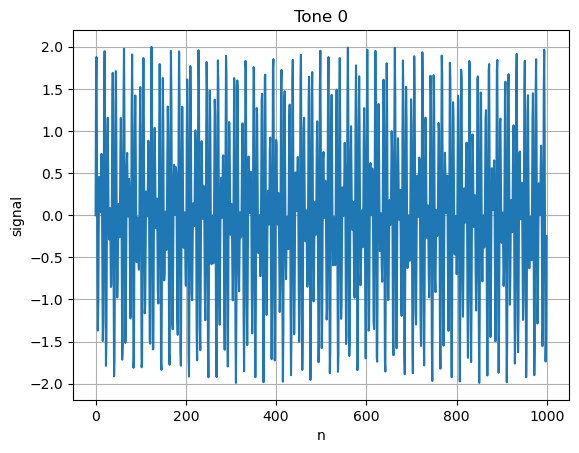

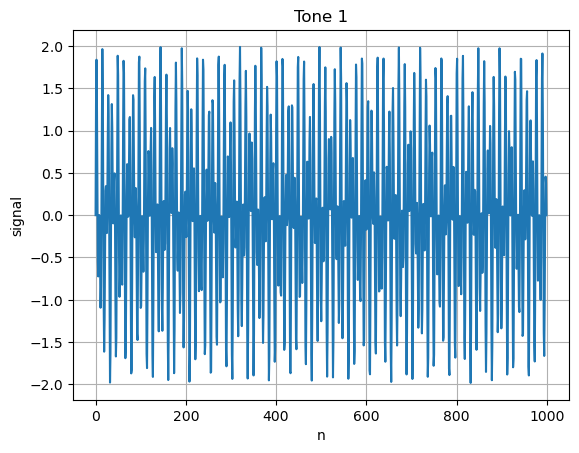

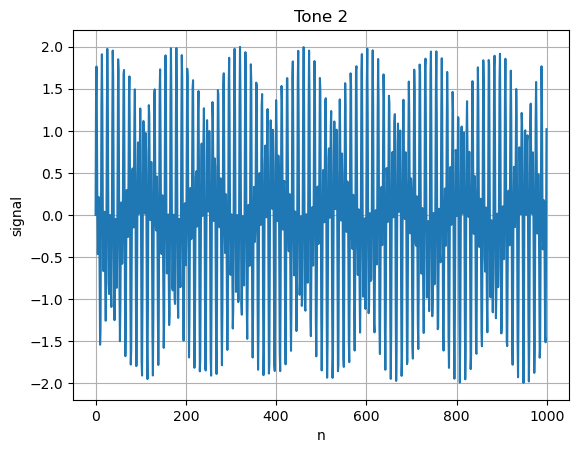

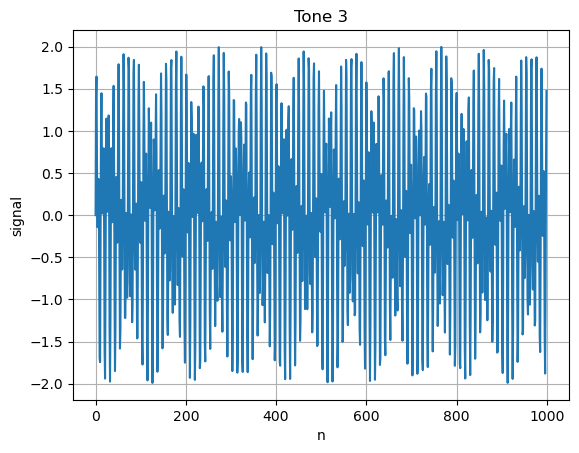

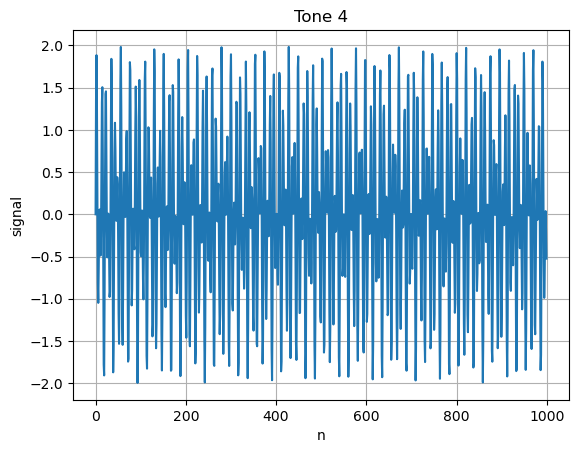

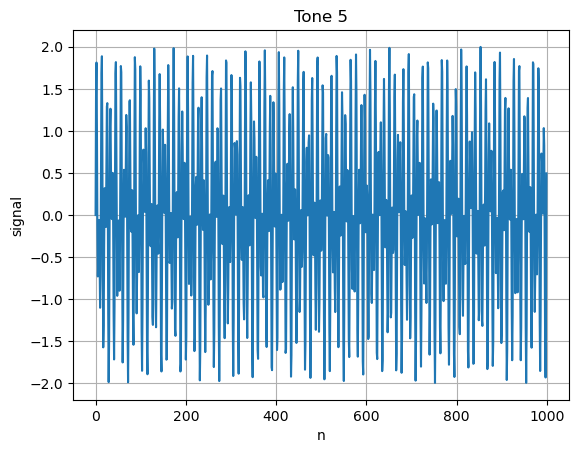

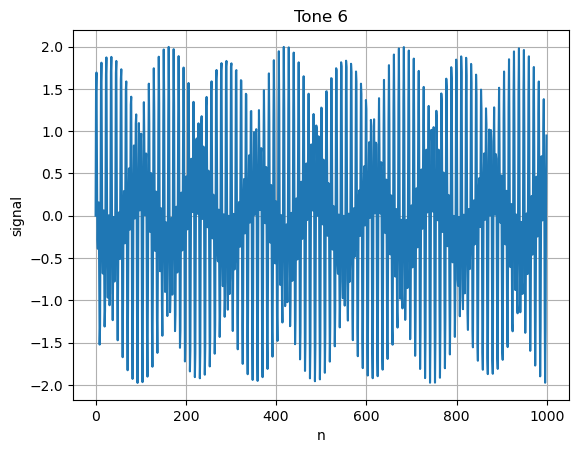

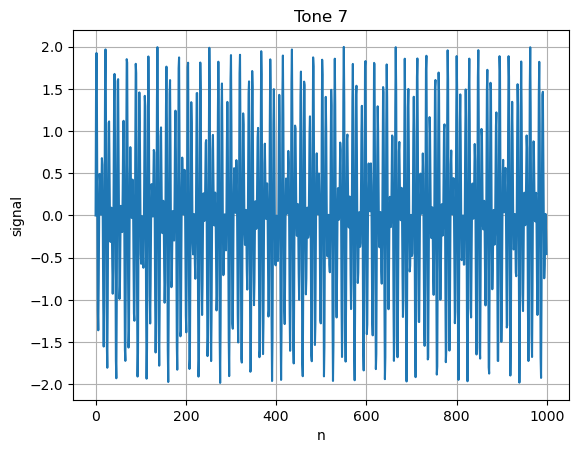

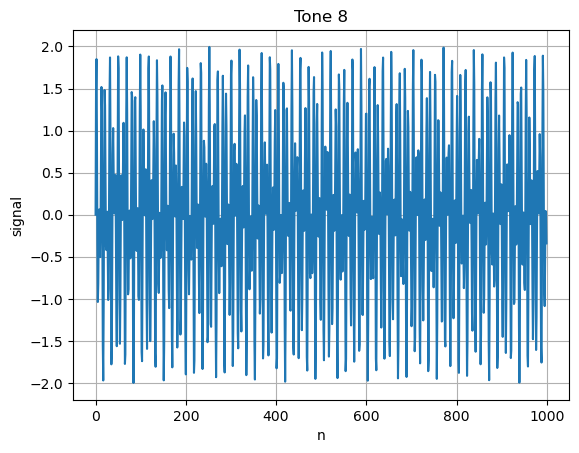

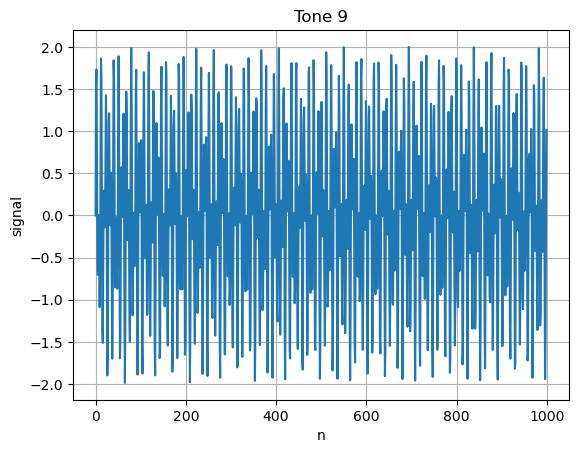

In [2]:
# 1.1 new

import numpy as np
import matplotlib.pyplot as plt
import IPython
import scipy as sp
import sounddevice as sd
from IPython.display import Audio
import os

# Sampling frequency
sampling_freq = 8192

# from 0 to 1000 with 1000 samples
n = np.linspace(0, 1000, 1000)

# Tone creation
tones = [np.sin(0.7217 * n) + np.sin(1.0247 * n),
np.sin(0.5346 * n) + np.sin(0.9273 * n),
np.sin(0.5346 * n) + np.sin(1.0247 * n),
np.sin(0.5346 * n) + np.sin(1.1328 * n),
np.sin(0.5906 * n) + np.sin(0.9273 * n),
np.sin(0.5906 * n) + np.sin(1.0247 * n),
np.sin(0.5906 * n) + np.sin(1.1328 * n),
np.sin(0.6535 * n) + np.sin(0.9273 * n),
np.sin(0.6535 * n) + np.sin(1.0277 * n),
np.sin(0.6535 * n) + np.sin(1.1328 * n)]


for i, tone in enumerate(tones):
    # Audio player
    display(Audio(tone, rate=sampling_freq))
    
    # Plot signal
    plt.figure()
    plt.plot(tone)
    plt.title(f'Tone {i}')
    plt.xlabel('n')
    plt.ylabel('signal')
    plt.grid(True)
    plt.show()
    

Text(0.5, 1.0, '|D0[k]|')

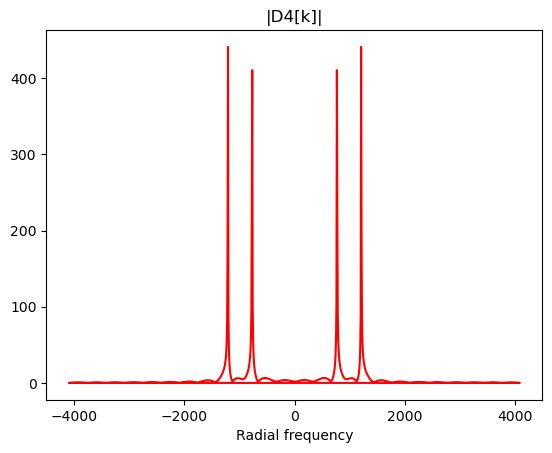

<Figure size 640x480 with 0 Axes>

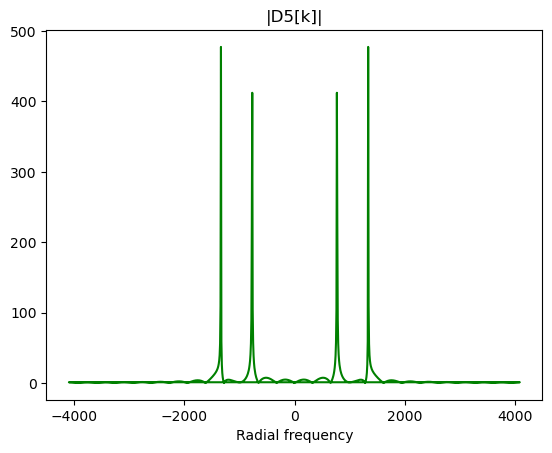

<Figure size 640x480 with 0 Axes>

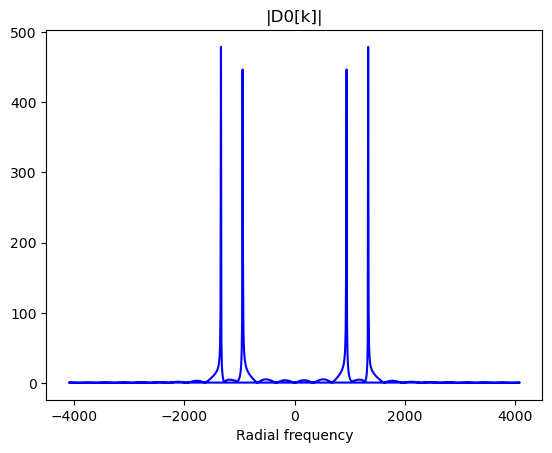

In [3]:
#1.2

#dft του d4
y4 = np.fft.fft(tones[4], 1024)
f4 = np.fft.fftfreq(len(y4), 1/ 8192)
plt.figure()
plt.plot(f4, np.abs(y4), color="red")
plt.xlabel("Radial frequency")
plt.title("|D4[k]|")

#dft του d5
y5 = np.fft.fft(tones[5], 1024)
f5 = np.fft.fftfreq(len(y5), 1/ 8192)
plt.figure()
plt.figure()
plt.plot(f5, np.abs(y5), color="green")
plt.xlabel("Radial frequency")
plt.title("|D5[k]|")

#dft του d0
y0 = np.fft.fft(tones[0], 1024)
f0 = np.fft.fftfreq(len(y0), 1/ 8192)
plt.figure()
plt.figure()
plt.plot(f0, np.abs(y0), color="blue")
plt.xlabel("Radial frequency")
plt.title("|D0[k]|")

In [12]:
#1.3

import numpy as np
import soundfile as sf
from IPython.display import Audio
from scipy.io.wavfile import write as write_wav
from scipy.interpolate import interp1d

# Αριθμός μητρώου
id_numbers = [0, 3, 1, 2, 1, 1, 4, 1]

# Αρχικοποίηση του συνολικού σήματος
signal = np.array([])

# Κατασκευή σήματος από Α.Μ.
for digit in id_numbers:
    signal = np.concatenate((signal, tones[digit]))
    # Προσθήκη 100 μηδενικών δειγμάτων μεταξύ ψηφίων
    silence = np.zeros(100)
    signal= np.concatenate((signal, silence))


# Αποθηκευση στο αρχείο
#sf.write("tone_sequence.wav", signal, 8192)

# Κανονικοποιούμε το αρχείο για να παίζει εκτός jupyter notebook
norm_signal = np.int16((signal/np.max(np.abs(signal)) * 32767))
# Αποθήκευση στο αρχείο
sf.write("tone_sequence.wav", norm_signal, 8192, subtype='PCM_16')


# Αναπαραγωγή του αρχείου ήχου
Audio("tone_sequence.wav")


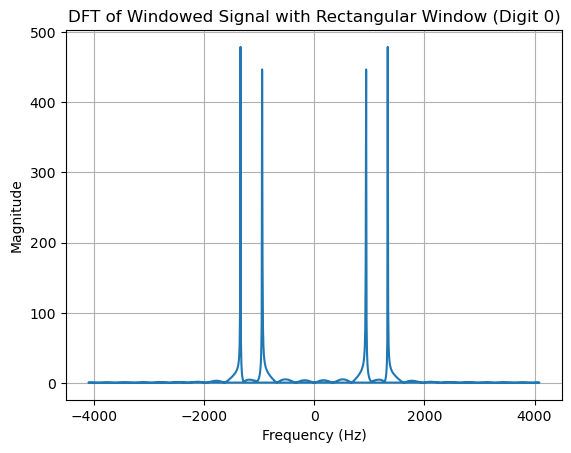

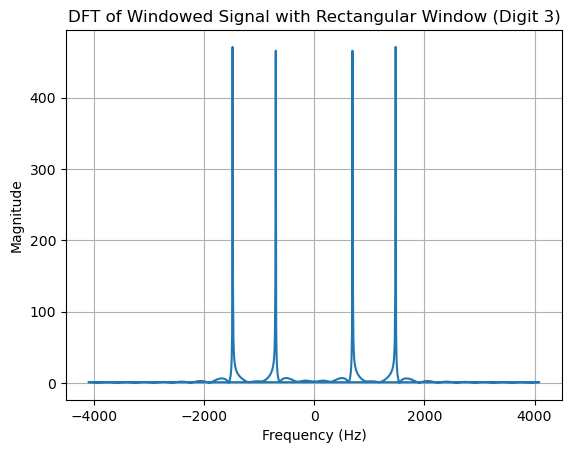

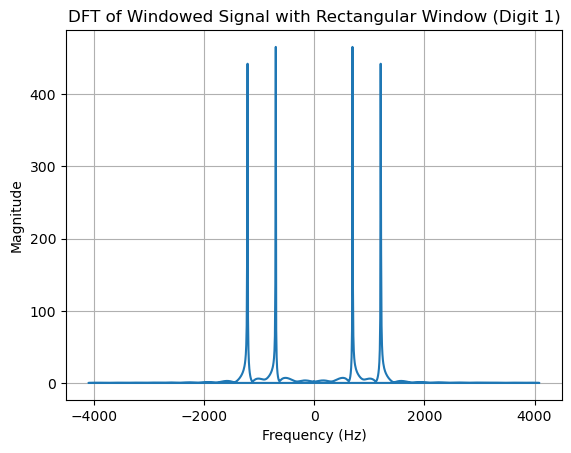

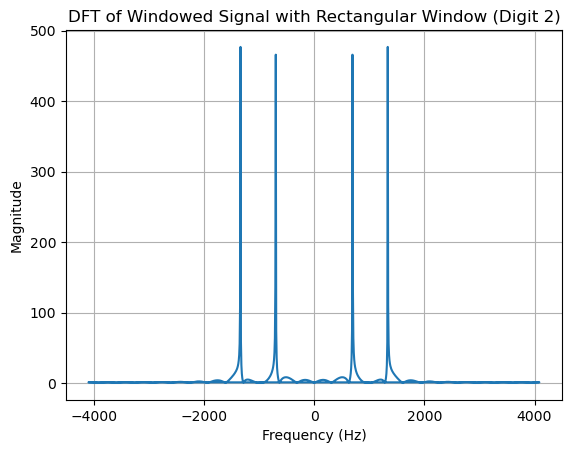

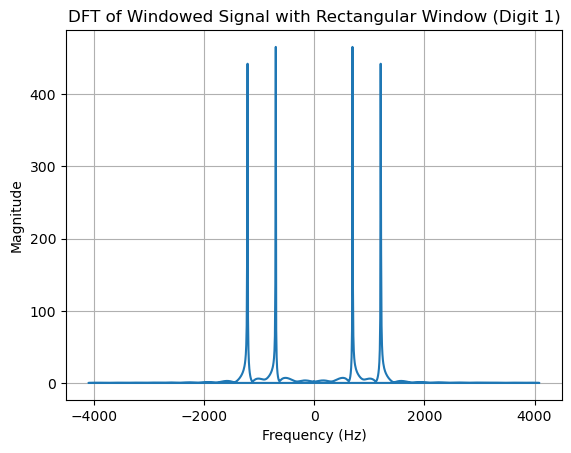

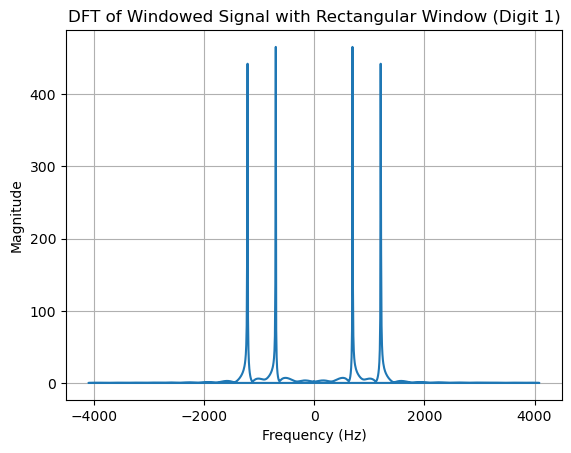

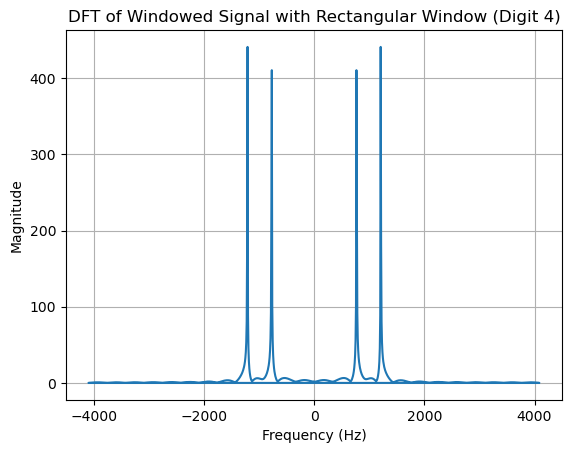

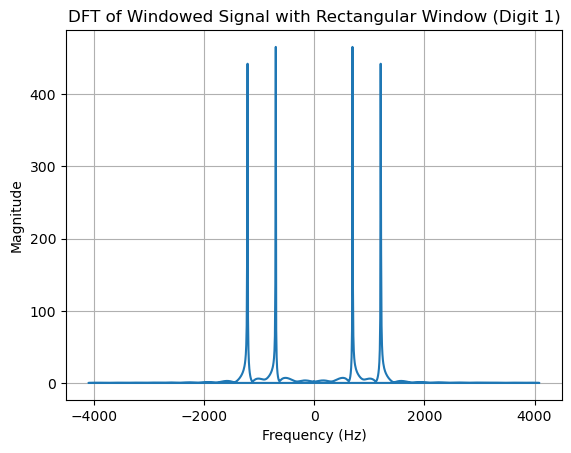

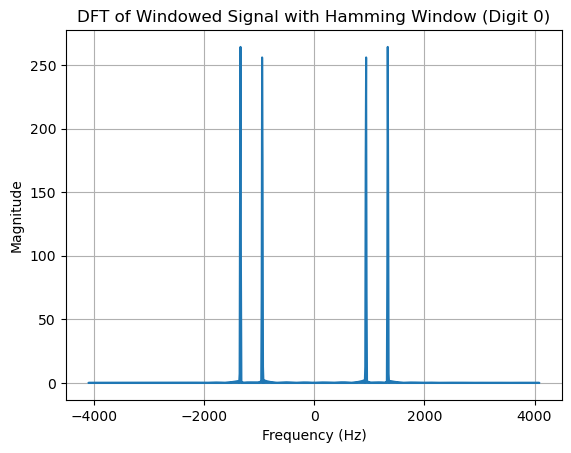

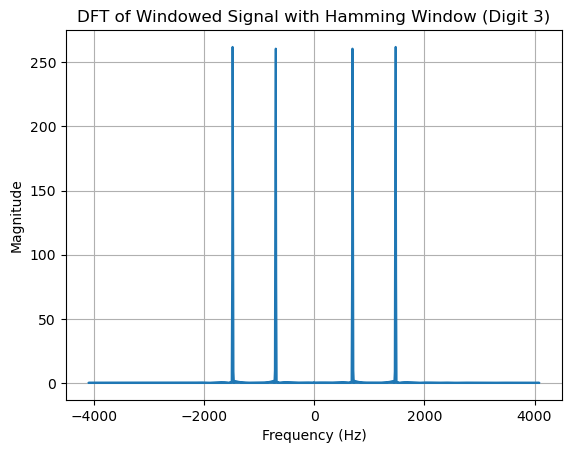

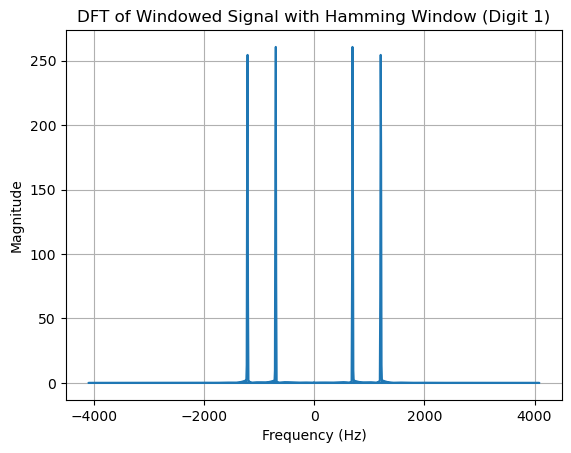

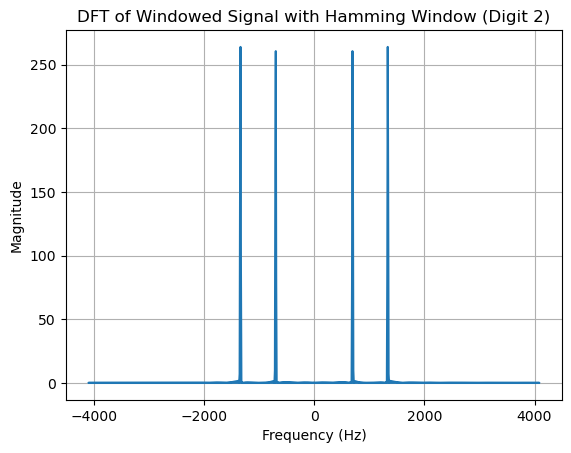

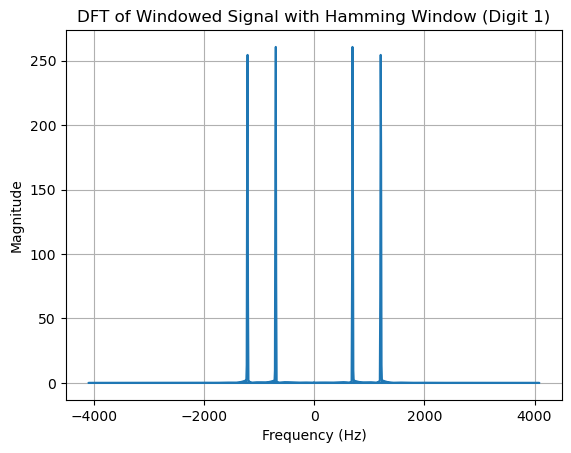

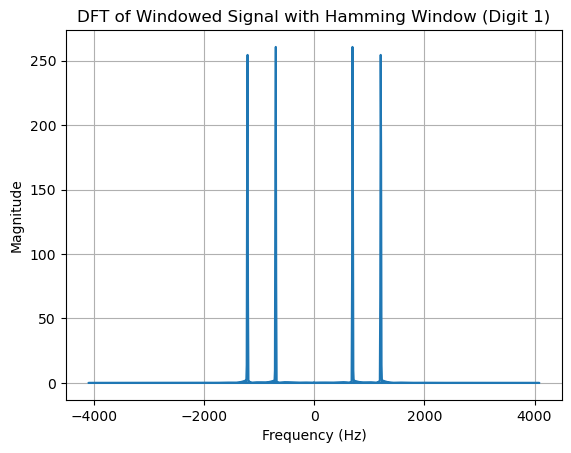

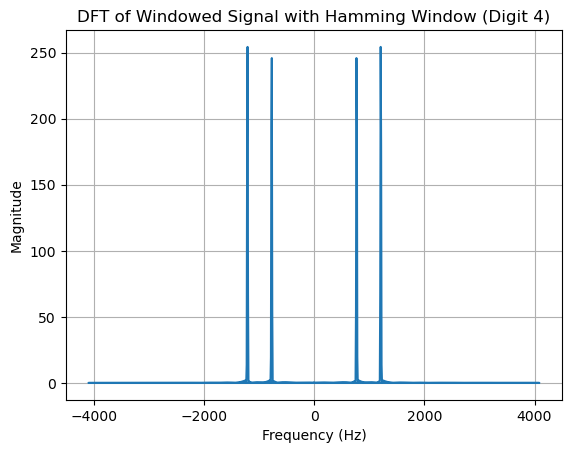

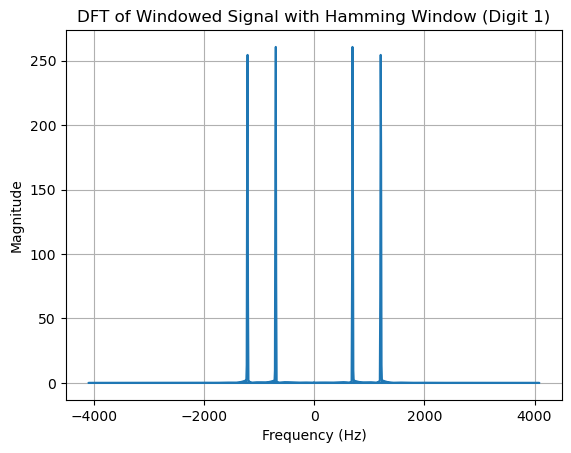

In [29]:
#1.4

# Καθορισμός μήκους παραθύρου
L = 1000

# Τυποι παραθύρων
rectangular_window = np.ones(L)
hamming_window = np.hamming(L)

# Κατασκευή παραθυρομένων σημάτων
windowed_signals = {}

# dict fft
fft_windowed_signals = {}

# Αριθμός σημείων του Μετ/μού Fourier
N = 1024

for number in id_numbers:
    tone = tones[number]
    # Τετραγωνικό παράθυρο μήκους L
    windowed_signal_rectangular = tone[:L] * rectangular_window
    # Hamming παράθυρο μήκους L
    windowed_signal_hamming = tone[:L] * hamming_window
    # Αποθήκευση στο dictionary
    windowed_signals[number] = {
        'windowed_signal_rectangular': windowed_signal_rectangular,
        'windowed_signal_hamming': windowed_signal_hamming
    }
    # Υπολογισμός fft για τα παραθυρομένα σήματα
    # Εφαρμογή fft στο σημα με τετραγωνικό παράθυρο
    fft_rect_wind_signal = np.fft.fft(windowed_signals[number]["windowed_signal_rectangular"], N)
    # Εφαρμογή fft στο σήμα με Hamming παράθυρο
    fft_hamm_wind_signal = np.fft.fft(windowed_signals[number]["windowed_signal_hamming"], N)
    # Αποθήκευση στο dict fft
    fft_windowed_signals[number] = {
        'fft_rect_wind_signal' : fft_rect_wind_signal,
        'fft_hamm_wind_signal' : fft_hamm_wind_signal
    }

# Plots rectangular window
for number in id_numbers:
    fft_result_rectangular = fft_windowed_signals[number]['fft_rect_wind_signal']
    f_rect = np.fft.fftfreq(len(fft_result_rectangular), 1/ 8192)
    plt.plot(f_rect, np.abs(fft_result_rectangular))
    plt.title(f'DFT of Windowed Signal with Rectangular Window (Digit {number})')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()


# Plots Hamming window
for number in id_numbers:
    fft_result_hamming = fft_windowed_signals[number]['fft_hamm_wind_signal']
    f_ham = np.fft.fftfreq(len(fft_result_rectangular), 1/ 8192)
    plt.plot(f_ham, np.abs(fft_result_hamming))
    plt.title(f'DFT of Windowed Signal with Hamming Window (Digit {number})')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.show()





In [30]:
# 1.5

# Αρχικοποιύμε τον πίνακα της ενέργειας του DFT
energy_fft = np.zeros((10, 1000))

# Αρχικοποιούμε τον πίνακα των δεικτών για του οποίους η ενέργεια είναι μεγαλύτερη από 100.000
g = np.zeros((10, 2))

# Υπολογισμός ενέργειας fft των τόνων
for i,tone in enumerate(tones):
    fft_result = np.fft.fft(tone)
    energy_fft[i, :] = np.abs(fft_result) ** 2
    indices = np.where(energy_fft[i, :] > 100000)[0]
    if len(indices) >= 2:
        g[i, :] = indices[:2]  # Take the first two indices
    else:
        g[i, :] = indices  # Assign all indices found
    
# Αρχικοποιούμε τη λίστα των k 
list_of_k = np.zeros((10,2), dtype=int)

# Κρατάμε τους 2 πρ΄ώτους δείκτες
for i in range(10):
    for j in range(2):
        list_of_k[i, j] = int(g[i, j])
print("List of k")
print(list_of_k)
print()
# Αρχικοποιούμε τη λίστα των συχνοτήτων
list_of_w = np.zeros((10, 2))

# Φτιάχνουμε τη λίστα με τις συχνότητες
for i in range(10):
    for j in range(2):
     list_of_w[i, j] = (2 * np.pi * list_of_k[i, j]) / 1000
print("List of w")
print(list_of_w)

List of k
[[115 163]
 [ 85 148]
 [ 85 163]
 [ 85 180]
 [ 94 148]
 [ 94 163]
 [ 94 180]
 [104 148]
 [104 164]
 [104 180]]

List of w
[[0.72256631 1.02415921]
 [0.53407075 0.92991143]
 [0.53407075 1.02415921]
 [0.53407075 1.13097336]
 [0.59061942 0.92991143]
 [0.59061942 1.02415921]
 [0.59061942 1.13097336]
 [0.65345127 0.92991143]
 [0.65345127 1.03044239]
 [0.65345127 1.13097336]]


In [15]:
# 1.6

def ttdecode(...)
    




SyntaxError: invalid syntax (2415116802.py, line 3)

In [31]:
# 1.7

import numpy as np
import matplotlib.pyplot as plt

# Φόρτωση αρχείων με χρήση load()
easy_sig = np.load('easy_sig.npy')
medium_sig = np.load('medium_sig.npy')
hard_sig = np.load('hard_sig.npy')

# Προσδιορισμός ψηφίων με χρήση της ttdecode()
digits_easy = ttdecode(easy_sig)
digits_medium = ttdecode(medium_sig)
digits_hard = ttdecode(hard_sig)

# Τύπωμα των ψηφίων
print("Digits for easy sig:", digits_easy)
print("Digits for medium sig:", digits_medium)
print("Digits for hard sig:", digits_hard)


NameError: name 'ttdecode' is not defined

Fs is 16000


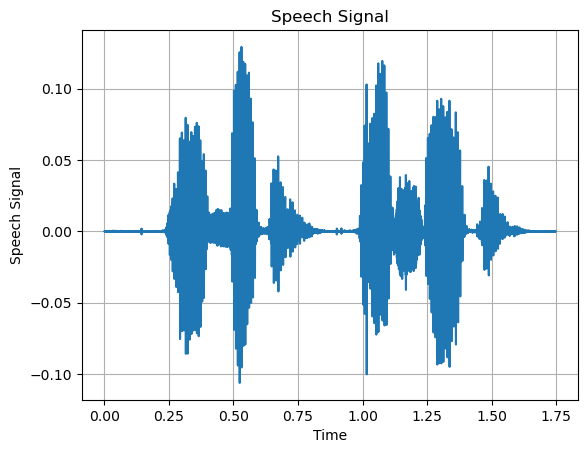

In [32]:
# 2.1

import numpy as np
import matplotlib.pyplot as plt
import IPython
from scipy.io import wavfile
import librosa
from IPython.display import Audio

# We load the speech signal from the given file
speech_signal, Fs = librosa.load('speech_utterance.wav', sr=16000)
print(f"Fs is {Fs}")
input_length = len(speech_signal)

# We plot the given signal
t = np.linspace(0, len(speech_signal)/Fs, len(speech_signal))
plt.plot(t, speech_signal)
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Speech Signal')
plt.grid(True)
plt.show()

# We make an audio player of the voice signal
display(Audio(speech_signal, rate=Fs))

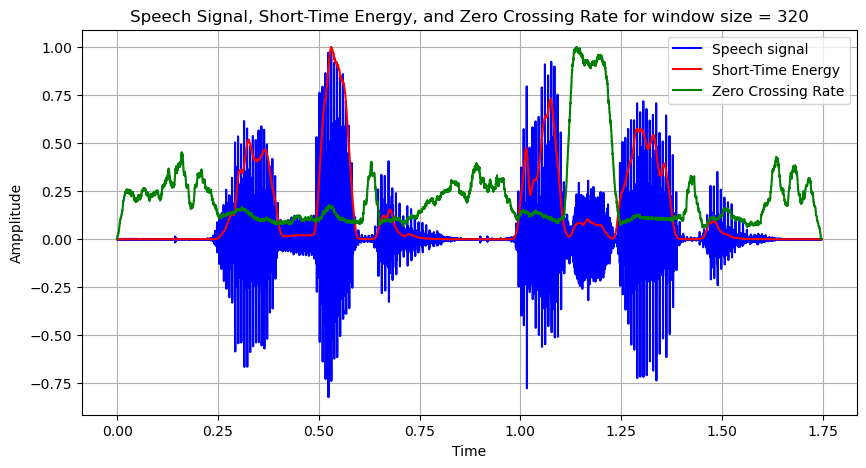

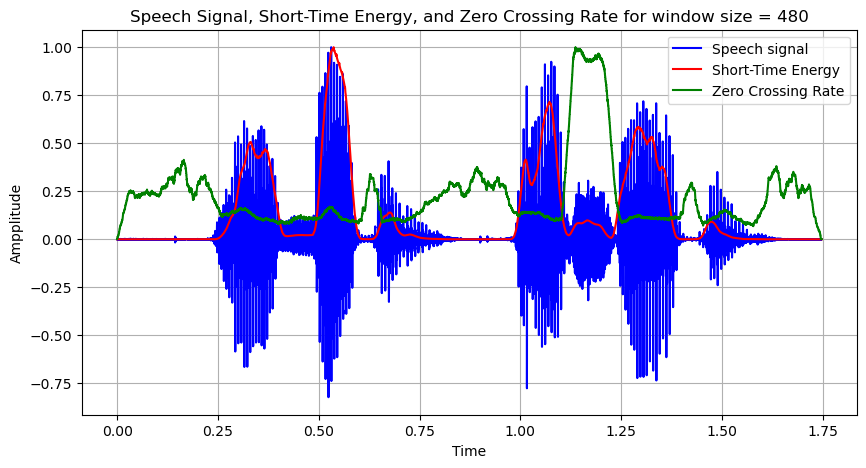

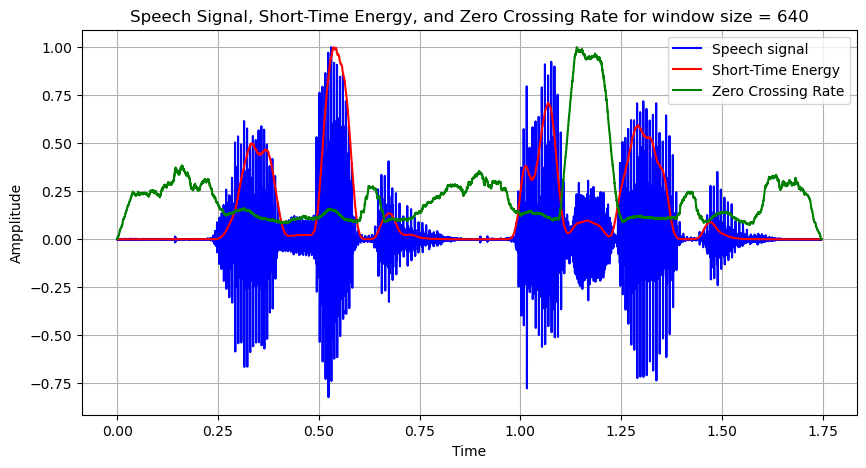

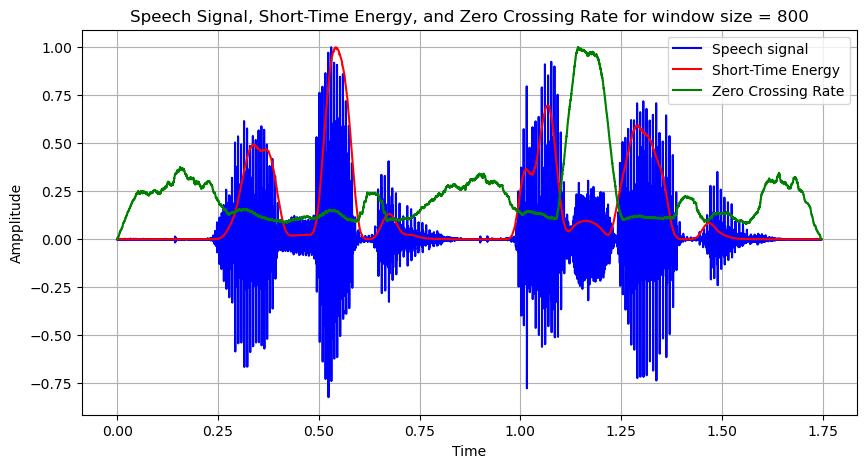

In [33]:
#2.2
from scipy.signal import convolve

# We set a minimum and maximum window size
N = int(Fs * 0.02) # starts from 20ms or 320 
max_length = int(Fs * 0.05) # starts from 50ms or 800

# Υπολογισμός ενέργειας βραχέως χρόνου και ρυθμού εναλλαγής προσήμου
while (N <= max_length):
    # Εφαρμόζουμε Hamming window για το εκάστοτε μήκος Ν
    ham_win = np.hamming(N)

    # Υπολογίζουμε την ενέργεια βραχέως χρόνου σαν συνέλιξη του τετραγώνου του σήματος και του παραθύρου hamming
    sqr_signal = (abs(speech_signal)) ** 2
    energy = convolve(sqr_signal, ham_win)

    # Κανουμε ολίσθηση του σήματος κατά μία θ΄έση ΄ωστε να πάρουμε το speech_signal[m-1]:
    signal_circ_shift = np.roll(speech_signal, 1)
    # Πρόσημο του ολισθημένου σήματος
    sgn_shift = np.sign(signal_circ_shift)
    # Πρόσημο του κανονικού σήματος
    sgn = np.sign(speech_signal)
    # Απόλυτο της διαφοράς των δύο προσήμων |sgnx([m]) - sgn(x[m-1])|
    sgn_diff = abs(sgn_shift - sgn)
    
    # Τετραγωνικό παράθυρο Ν δειγμάτων μήκους 1/2Ν
    rec_win = (1/2*int(N))*(np.ones(int(N)))

    # Υπολογίζουμε τον ρυρμό εναλλαγής προσήμου σαν συνέλιξη 
    zero_cross = convolve(sgn_diff,rec_win)

    # Κανονικοποίηση της ενεργειας και του ρυθμού αλλαγής προσήμου γιατί η ενέργεια παίρνει σημαντικά διαφορετικές τιμές από το Zn
    # οπότε κανονικοποιούμε όλα τα προς πλοτάρισμα σήματα
    energy = energy/np.max(abs(energy))
    zero_cross = zero_cross/np.max(abs(zero_cross))
    speech_signal = speech_signal/np.max(speech_signal)


    # Πλοτάρουμε την ενέργεια βραχέως χρόνου, το ρυθμό εναλλαγής προσήμου και το αρχικό μας σήμα σε κοινό διάγραμμα
    plt.figure(figsize = (10,5))
    plt.plot(t, speech_signal, color='blue', label = "Speech signal")
    plt.legend()

    # Πλοτάρουμε την ενέργεια βραχέως χρόνου
    t_e = np.linspace(0, len(speech_signal)/Fs, len(energy))
    plt.plot(t_e, energy, color='red', label='Short-Time Energy')
    plt.legend()
    
    # Πλοτάρουμε τον ρυθμό εναλλαγής προσήμου
    t_z = np.linspace(0, len(speech_signal)/Fs, len(zero_cross))
    plt.plot(t_z, zero_cross, color='green', label='Zero Crossing Rate')
    plt.legend()
    
    # Ορίζουμε τίτλο και ετικέτες των αξόνων
    plt.title(f'Speech Signal, Short-Time Energy, and Zero Crossing Rate for window size = {N}')
    plt.xlabel('Time')
    plt.ylabel('Ampplitude')
    plt.grid(True)
    
    # Αυξάνουμε το μήκος του παραθύρου 
    N += int((Fs * 0.01)) 



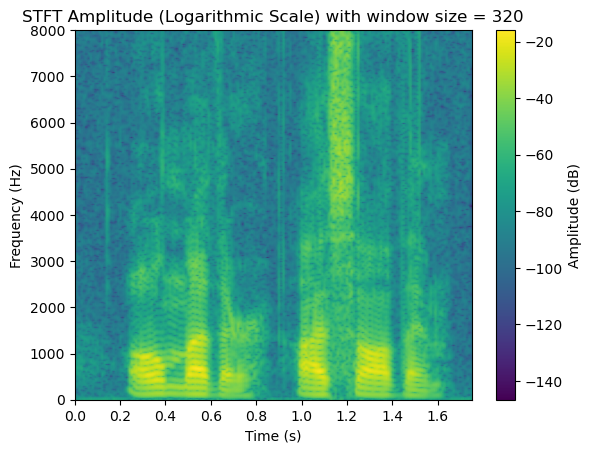

array([ 3.53753222e-08,  8.81225848e-09,  3.00127425e-08, -2.69609490e-08,
       -2.43487523e-08,  2.45040610e-09,  6.76468837e-09, -7.35718997e-09,
       -9.26373467e-09,  6.25672136e-09, -1.45256163e-08,  1.92282723e-08,
       -1.30551676e-08,  2.36861254e-07, -1.48411331e-07, -1.06757213e-07,
        3.29043779e-08, -1.25191857e-08, -1.25961037e-08,  7.85967558e-09,
        2.33520847e-09,  2.22051888e-08,  1.82876377e-07,  1.20923469e-05,
        1.03943792e-04,  1.55904680e-04,  3.20698542e-04,  1.29933396e-04,
        6.98935939e-04,  6.20823179e-04,  1.42871388e-04,  7.03700411e-04,
       -4.32863104e-04, -1.55640009e-04,  1.22165991e-04,  2.41404021e-04,
       -4.02142177e-04, -8.39258195e-04, -5.44750947e-04, -7.17105751e-04,
       -7.41235490e-05,  8.15770454e-06,  1.38089199e-05,  1.45653576e-05,
       -8.42653776e-07, -8.51380173e-06,  3.77968900e-06,  2.43707541e-06,
        4.00503835e-04,  1.95229042e-03,  1.63376774e-03,  8.94489291e-04,
        6.35249482e-04, -

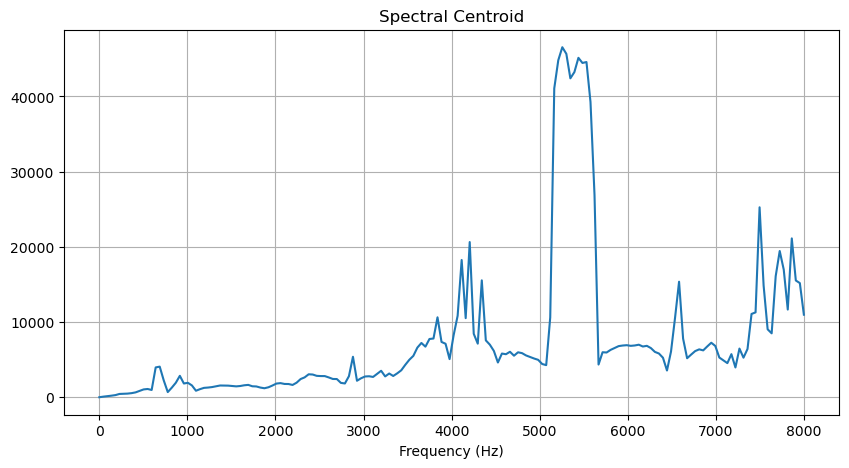

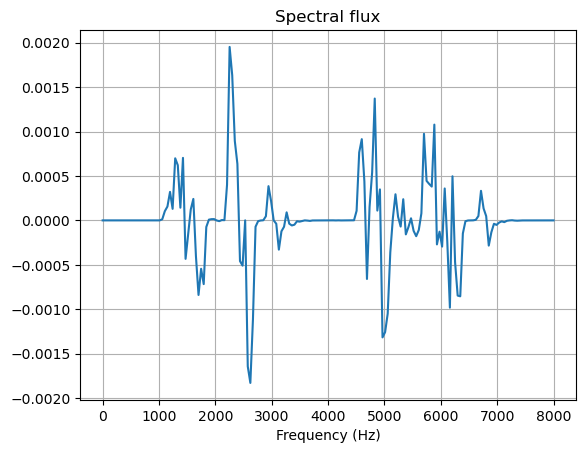

In [34]:
# 2.3
import scipy.signal as sg

# Υπολογισμός STFT
window_length_sec = 0.02 # αυξάνοντας το μήκος του παραθύορυ παρατηρούμε ότι το διάγραμμα γίνεται πιο "λείο"
nperseg = int(window_length_sec * Fs) # πλήθος δειγμάτων στο παράθυρο 
nfft = 2048 # Πλήθος σημείων για τον μετ/μο Fourier
f, t, Zxx = sg.stft(speech_signal, fs=Fs, nperseg=nperseg, nfft=nfft) # Zxx:2-διαστατος πίνακας που περιέχει το STFT
                                                                                # t:πίνακας με χρονικά σημεία (s) που αντιπροσωπεύουν το μέσο κάθε μέρους
                                                                                # f:πίνακας με συχνοτητες (Hz) στις οποίες υπολογίζεται ο STFT 

# Σχεδιάζουμε το πλάτος σε λογαριθμική κλίμακα
amp = np.abs(Zxx) 
amp_log = 20 * np.log10(amp)

# Πλοτάρουμε το φασματογράφημα
plt.pcolormesh(t, f, amp_log, shading='gouraud')
plt.colorbar(label='Amplitude (dB)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title(f'STFT Amplitude (Logarithmic Scale) with window size = {nperseg}')
plt.show()

# Υπολογισμός φασματικού κέντρου
def spectral_centroid(X): # X είναι ο πίνακας του STFT
    frames_number = X.shape[1] # πλ΄ήθος στηλών του STFT
    freq_bins = X.shape[0] # πλήθος γραμμών του STFT

    # Υπολογίζουμε το ΄άθροισμα των k * |X[k, m]|^2
    sum_k_X = np.sum(np.arange(freq_bins)[:, np.newaxis] * np.abs(X)**2, axis=0)

    # Υπολογίζουμε το άθροισμα των |X[k, m]|^2
    sum_X = np.sum(np.abs(X)**2, axis=0)

    # Φασματικό κέντρο
    SCm = sum_k_X / sum_X * (frames_number / 2) * (np.arange(frames_number) * 2 * np.pi * frames_number / freq_bins) / frames_number

    # Πλοτάρουμε το φασματικό κέντρο
    plt.figure(figsize=(10,5))
    freq_axis = np.linspace(0, Fs/2, len(SCm)) # Fs / 2 για να αποφύγουμε aliasing σύμφωνα με το θεώρημα Nyquist-Shannon: Fs >= 2*Fmax
    plt.plot(freq_axis, SCm)
    plt.title('Spectral Centroid')
    plt.xlabel('Frequency (Hz)')
    plt.grid(True)
    return SCm

spectral_centroid(Zxx)

# Υπολογισμός φασματικής ροής
def spectral_flux(X): # X είναι ο πίνακας του STFT
    frames_number = X.shape[1] 

    # Υπολογίζουμε τη τετραγωνική διαφορά μεγέθους μεταξύ διαδοχικών πλαισίων
    squared_diff = np.diff(np.abs(X)**2, axis=1)

    # Φασματική ροή
    SFm = np.sum(squared_diff, axis=0) / (frames_number / 2) # διαιρούμε με το πλήθος των παραθύρων/2 ώστε να προσαρμόσουμε την τιμή της φασματικής ροής  
                                   # σε σχέση με το πλήθος των παραθύρων. Έτσι δεν επηρεάζεται από το μήκος του σήματος ή τον αριθμό των frames του STFT                           

    # Πλοτάρουμε τη φασματική ροή
    plt.figure()
    freq_axis = np.linspace(0, Fs/2, len(SFm)) # Fs / 2 για να αποφύγουμε aliasing σύμφωνα με το θεώρημα Nyquist-Shannon: Fs >= 2*Fmax
    plt.plot(freq_axis, SFm)
    plt.title('Spectral flux')
    plt.xlabel('Frequency (Hz)')
    plt.grid(True)
    return SFm

spectral_flux(Zxx)
    

Fs_m is 48000


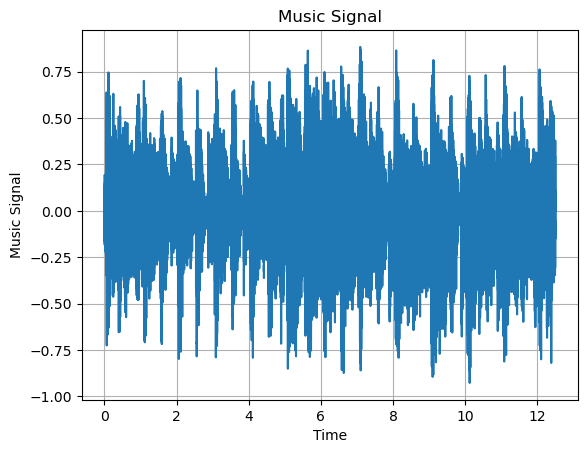

In [35]:
# 2.4.1

import numpy as np
import matplotlib.pyplot as plt
import IPython
from scipy.io import wavfile
import librosa
from IPython.display import Audio

# Διαβάζουμε το σήμα μουσικής από το δοσμένο αρχείο
music, Fs_m = librosa.load('music.wav', sr=48000)
print(f"Fs_m is {Fs_m}")
input_length_m = len(music)

# Πλοτάρουμε το δοσμένο σήμα
t_m = np.linspace(0, len(music)/Fs_m, len(music))
plt.plot(t_m, music)
plt.title('Music Signal')
plt.xlabel('Time')
plt.ylabel('Music Signal')
plt.grid(True)
plt.show()

# Αναπαραγωγή του σήματος μουσικής
display(Audio(music, rate=Fs_m))

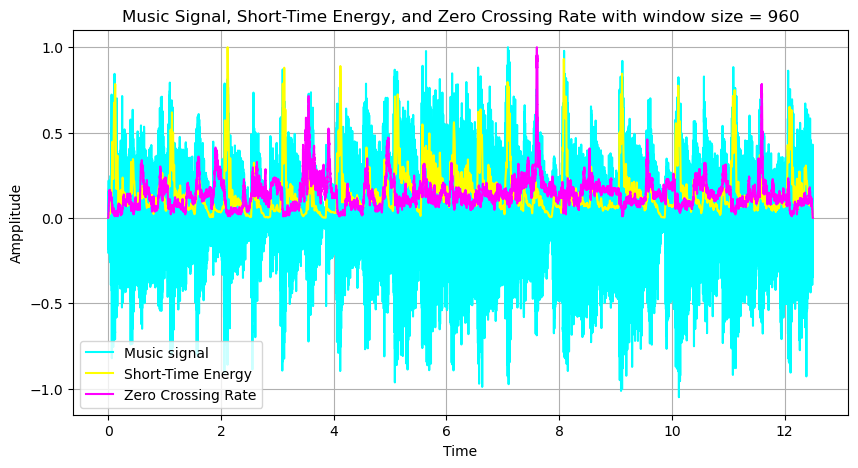

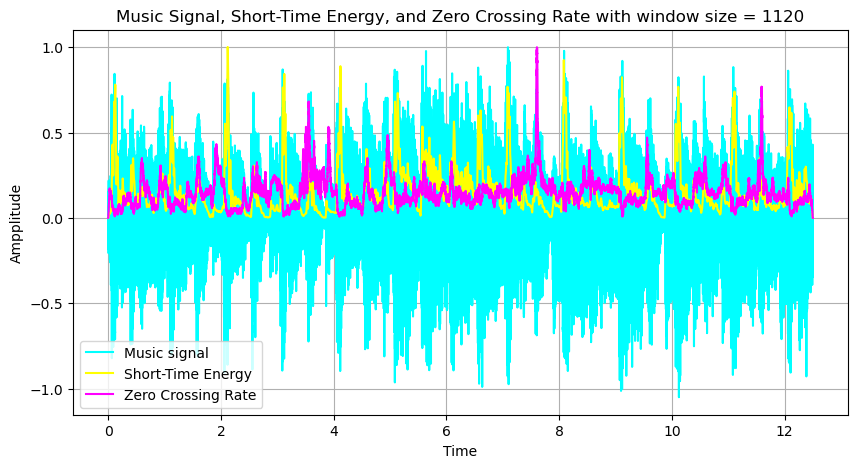

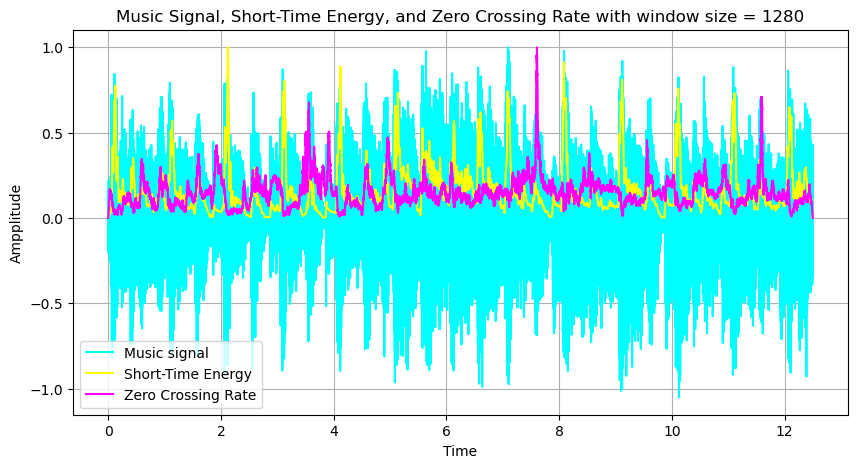

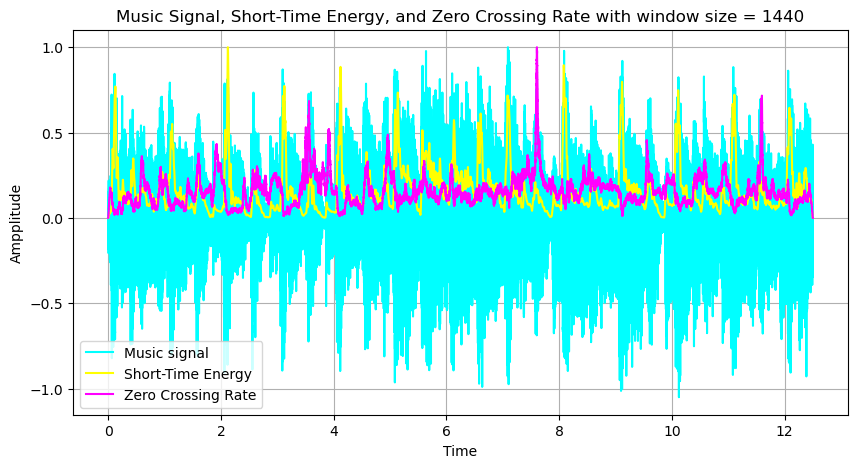

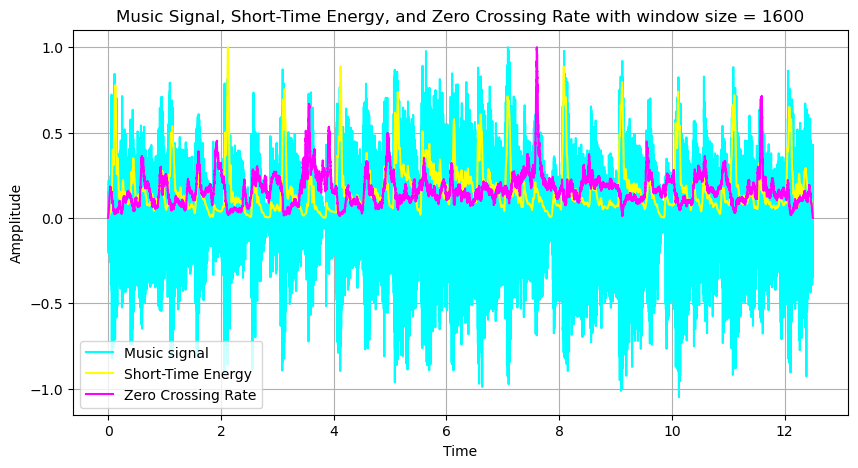

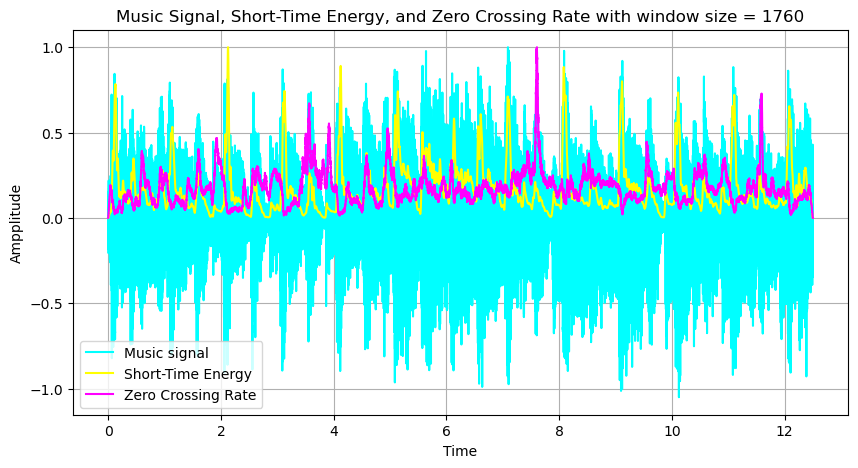

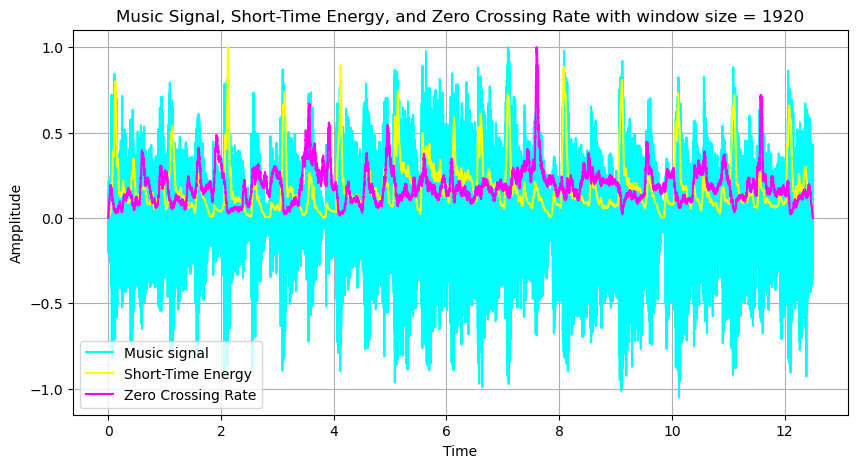

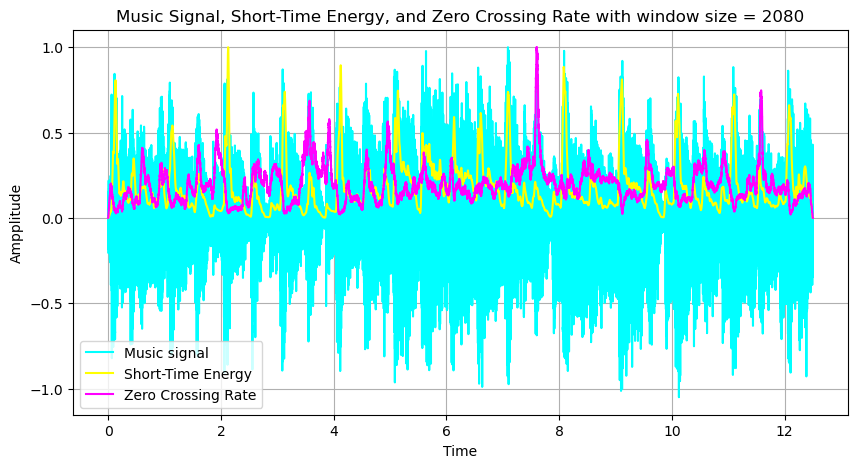

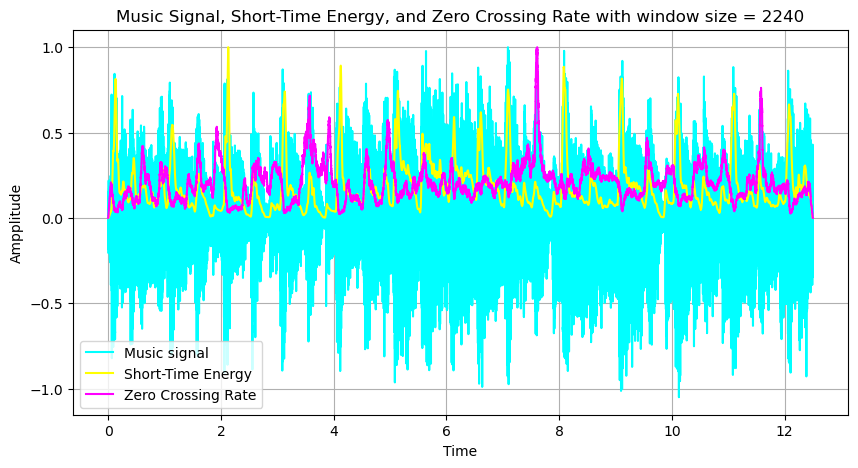

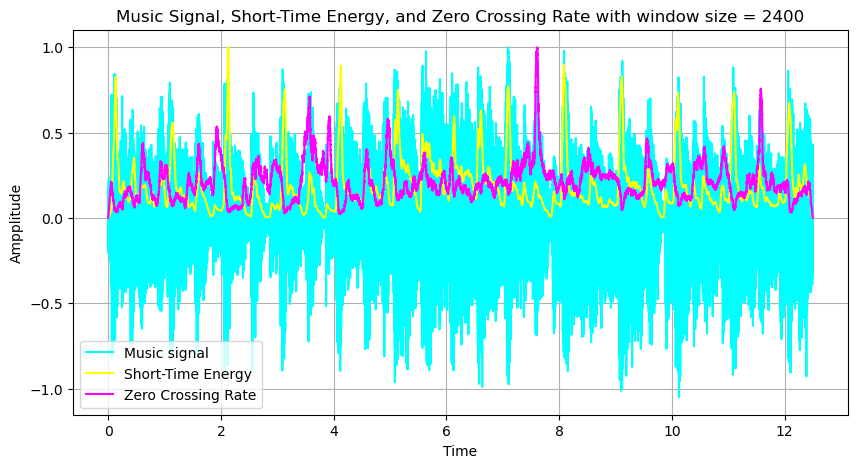

In [36]:
#2.4.2
from scipy.signal import convolve

# Ορίζουμε ελάχιστο και μέγιστο μέγεθος παραθύρου
N_m = int(Fs_m * 0.02) # ξεκινάει από 20ms ή 960
max_length_m = int(Fs_m * 0.05) # φτάνει μέχρι 50ms ή 2400

# Υπολογισμός ενέργειας βραχέως χρόνου και ρυθμού εναλλαγής προσήμου
while (N_m <= max_length_m):
    # Εφαρμόζουμε Hamming window για το εκάστοτε μήκος Ν
    ham_win_m = np.hamming(N_m)

    # Υπολογίζουμε την ενέργεια βραχέως χρόνου σαν συνέλιξη του τετραγώνου του σήματος και του παραθύρου hamming
    sqr_signal_m = (abs(music)) ** 2
    energy_m = convolve(sqr_signal_m, ham_win_m)

    # Κανουμε ολίσθηση του σήματος κατά μία θ΄έση ΄ωστε να πάρουμε το music[m-1]:
    signal_circ_shift_m = np.roll(music, 1)
    # Πρόσημο του ολισθημένου σήματος
    sgn_shift_m = np.sign(signal_circ_shift_m)
    # Πρόσημο του κανονικού σήματος
    sgn_m = np.sign(music)
    # Απόλυτο της διαφοράς των δύο προσήμων |sgnx([m]) - sgn(x[m-1])|
    sgn_diff_m = abs(sgn_shift_m - sgn_m)
    
    # Τετραγωνικό παράθυρο Ν δειγμάτων μήκους 1/2Ν
    rec_win_m = (1/2*int(N_m))*(np.ones(int(N_m)))

    # Υπολογίζουμε τον ρυρμό εναλλαγής προσήμου σαν συνέλιξη 
    zero_cross_m = convolve(sgn_diff_m,rec_win_m)

    # Κανονικοποίηση της ενεργειας και του ρυθμού αλλαγής προσήμου γιατί η ενέργεια παίρνει σημαντικά διαφορετικές τιμές από το Zn
    # οπότε κανονικοποιούμε όλα τα προς πλοτάρισμα σήματα
    energy_m = energy_m/np.max(abs(energy_m))
    zero_cross_m = zero_cross_m/np.max(abs(zero_cross_m))
    music = music/np.max(music)


    # Πλοτάρουμε την ενέργεια βραχέως χρόνου, το ρυθμό εναλλαγής προσήμου και το αρχικό μας σήμα σε κοινό διάγραμμα
    plt.figure(figsize = (10,5))
    plt.plot(t_m, music, color='cyan', label = "Music signal")
    plt.legend()

    # Πλοτάρουμε την ενέργεια βραχέως χρόνου
    t_e_m = np.linspace(0, len(music)/Fs_m, len(energy_m))
    plt.plot(t_e_m, energy_m, color='yellow', label='Short-Time Energy')
    plt.legend()

    # Πλοτάρουμε τον ρυθμό εναλλαγής προσήμου
    t_z_m = np.linspace(0, len(music)/Fs_m, len(zero_cross_m))
    plt.plot(t_z_m, zero_cross_m, color='magenta', label='Zero Crossing Rate')
    plt.legend()

    # Ορίζουμε τίτλο και ετικέτες των αξόνων
    plt.title(f'Music Signal, Short-Time Energy, and Zero Crossing Rate with window size = {N_m}')
    plt.xlabel('Time')
    plt.ylabel('Ampplitude')
    plt.grid(True)
    
    # Αυξάνουμε το μήκος του παραθύρου 
    N_m += int(Fs * 0.01) 



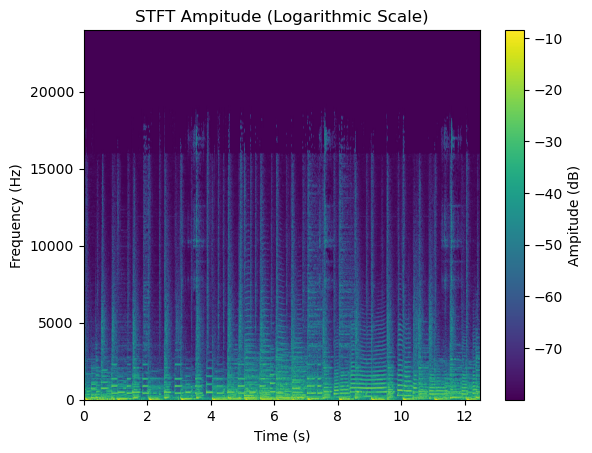

array([ 1.0768552e-05, -4.3885507e-06,  1.2869751e-05, ...,
        1.2934089e-05,  9.6242529e-06, -4.3734974e-05], dtype=float32)

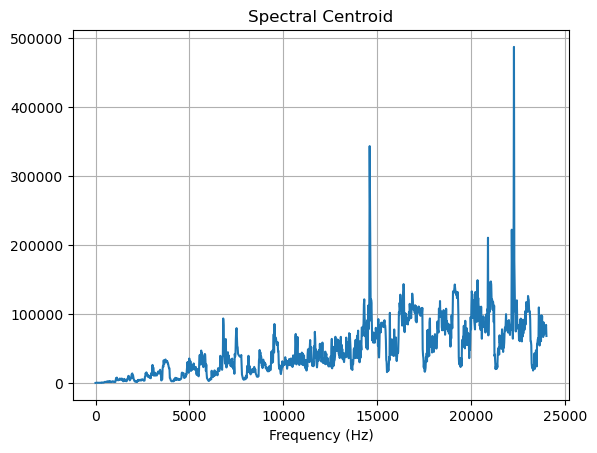

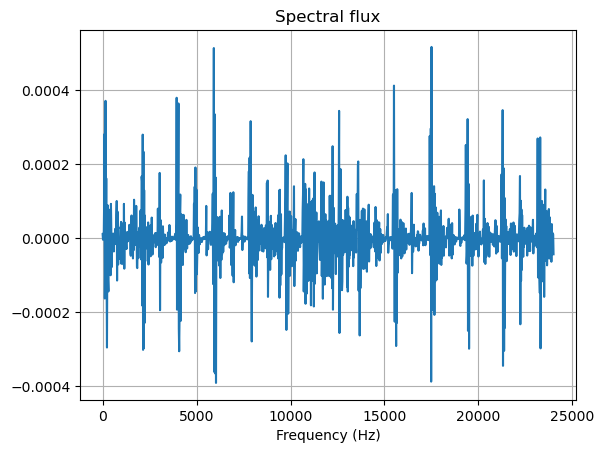

In [37]:
# 2.4.3
import scipy.signal as sg

# Υπολογισμός STFT
window_length_sec_m = 0.02 # αυξάνοντας το μήκος του παραθύορυ παρατηρούμε ότι το διάγραμμα γίνεται πιο "λείο"
nperseg_m = int(window_length_sec_m * Fs_m) # πλήθος δειγμάτων στο παράθυρο 
nfft_m = 2048 # Πλήθος σημείων για τον μετ/μο Fourier
f_m, t_m, Zxx_m = sg.stft(music, fs=Fs_m, nperseg=nperseg_m, nfft=nfft_m) # Zxx:2-διαστατος πίνακας που περιέχει το STFT
                                                                                # t:πίνακας με χρονικά σημεία (s) που αντιπροσωπεύουν το μέσο κάθε μέρους
                                                                                # f:πίνακας με συχνοτητες (Hz) στις οποίες υπολογίζεται ο STFT 

# Σχεδιάζουμε το πλάτος σε λογαριθμική κλίμακα
amp_m = np.abs(Zxx_m) 
amp_log_m = 20 * np.log10(amp_m + 0.0001)

# Πλοτάρουμε το φασματογράφημα
plt.pcolormesh(t_m, f_m, amp_log_m, shading='gouraud')
plt.colorbar(label='Ampitude (dB)')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time (s)')
plt.title('STFT Ampitude (Logarithmic Scale)')
plt.show()

# Υπολογισμός φασματικού κέντρου
def spectral_centroid(X_m): # X είναι ο πίνακας του STFT
    frames_number_m = X_m.shape[1] # πλ΄ήθος στηλών του STFT
    freq_bins_m = X_m.shape[0] # πλήθος γραμμών του STFT

    # Υπολογίζουμε το ΄άθροισμα των k * |X[k, m]|^2
    sum_k_X_m = np.sum(np.arange(freq_bins_m)[:, np.newaxis] * np.abs(X_m)**2, axis=0)

    # Υπολογίζουμε το άθροισμα των |X[k, m]|^2
    sum_X_m = np.sum(np.abs(X_m)**2, axis=0)

    # Φασματικό κέντρο
    SCm_m = sum_k_X_m / sum_X_m * (frames_number_m / 2) * (np.arange(frames_number_m) * 2 * np.pi * frames_number_m / freq_bins_m) / frames_number_m

    # Πλοτάρουμε το φασματικό κέντρο
    plt.figure()
    freq_axis_m = np.linspace(0, Fs_m/2, len(SCm_m)) # Fs_m / 2 για να αποφύγουμε aliasing σύμφωνα με το θεώρημα Nyquist-Shannon: Fs >= 2*Fmax
    plt.plot(freq_axis_m, SCm_m)
    plt.title('Spectral Centroid')
    plt.xlabel('Frequency (Hz)')
    plt.grid(True)
    return SCm_m

spectral_centroid(Zxx_m)

# Υπολογισμός φασματικής ροής
def spectral_flux(X_m): # X_m είναι ο πίνακας του STFT
    frames_number_m = X_m.shape[1] 

    # Υπολογίζουμε τη τετραγωνική διαφορά μεγέθους μεταξύ διαδοχικών πλαισίων
    squared_diff_m = np.diff(np.abs(X_m)**2, axis=1)

    # Φασματική ροή
    SFm_m = np.sum(squared_diff_m, axis=0) / (frames_number_m / 2) # διαιρούμε με το πλήθος των παραθύρων/2 ώστε να προσαρμόσουμε την τιμή της φασματικής ροής  
                                   # σε σχέση με το πλήθος των παραθύρων. Έτσι δεν επηρεάζεται από το μήκος του σήματος ή τον αριθμό των frames του STFT                           

    # Πλοτάρουμε τη φασματική ροή
    plt.figure()
    freq_axis_m = np.linspace(0, Fs_m/2, len(SFm_m)) # Fs_m / 2 για να αποφύγουμε aliasing σύμφωνα με το θεώρημα Nyquist-Shannon: Fs >= 2*Fmax
    plt.plot(freq_axis_m, SFm_m)
    plt.title('Spectral flux')
    plt.xlabel('Frequency (Hz)')
    plt.grid(True)
    return SFm_m

spectral_flux(Zxx_m)

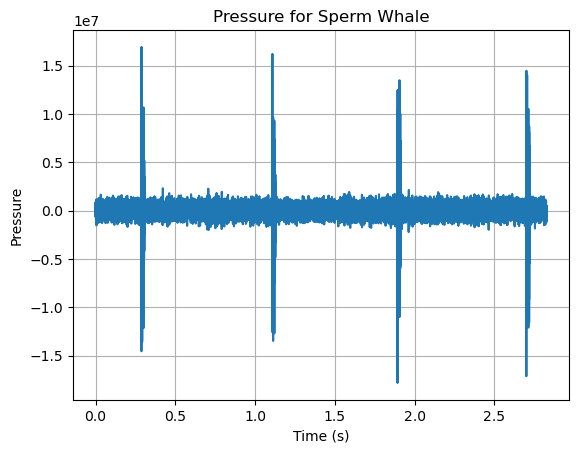

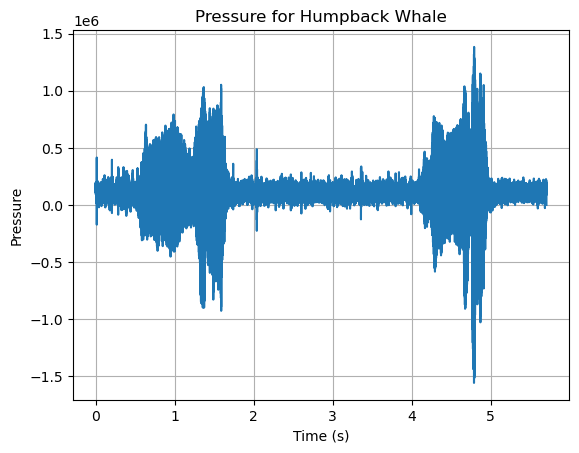

In [38]:
# 3.1

import numpy as np
import librosa
from IPython.display import Audio
import matplotlib.pyplot as plt

# Gain factor
GF = 0.16
# Sensitivity
S = -155 #dB relative to 1V/μPa

# Για τη φάλαινα φυσητήρα (Sperm whale)

# Φορτώνουμε το σήμα ήχου
y_sp, Fs_sp = librosa.load('85005006.wav')
#print(f"The Fs_sp is {Fs_sp}")
#display(Audio('85005006.wav'))

# Πίεση για φάλαινα Φυσητήρα
pressure_sp = (3.5 * y_sp * GF) / (10**(S / 20))

# Πλοτάρουμε τη πίεση στο χρόνο για τη φάλαινα φυσητήρα
plt.figure()
t_sp = np.linspace(0, len(pressure_sp) / Fs_sp, len(pressure_sp))
plt.plot(t_sp, pressure_sp)
plt.xlabel('Time (s)')
plt.title('Pressure for Sperm Whale')
plt.ylabel('Pressure')
plt.grid(True)


# Για τη μεγάπτερη φάλαινα (Hampback whale)

# Φορτώνουμε το σήμα ήχου
y_hmp, Fs_hmp = librosa.load('9220100Q.wav')
#print(f"The Fs_hmp is {Fs_hmp}")
#display(Audio('9220100Q.wav'))

# Πίεση για μεγάπτερη φάλαινα
pressure_hmp = (3.5 * y_hmp * GF) / (10**(S / 20))

# Πλοτάρουμε τη πίεση στο χρόνο για τη μεγάπτερη φάλαινα 
plt.figure()
t_hmp = np.linspace(0, len(pressure_hmp) / Fs_hmp, len(pressure_hmp))
plt.plot(t_hmp, pressure_hmp)
plt.xlabel('Time (s)')
plt.title('Pressure for Humpback Whale')
plt.ylabel('Pressure')
plt.grid(True)


In [39]:
# 3.2

# For the Sperm Whale
N_sp = len(y_sp)

# Αθροισμα τετραγώνων πιέσεων
sum_p_sp = np.sum(pressure_sp[1:N_sp+1] ** 2)

# Υπολογισμός μέσης τετραγωνικής ρίζας της πίεσης
p_rms_sp = np.sqrt((1/N_sp)*sum_p_sp)
print(f"p_rms_sp is {p_rms_sp}")

p_ref = 1 #μPa 

# Sound Pressure Level
SPL_rms_sp = 20*np.log10(p_rms_sp / p_ref)

print(f"SPLrms_sp is {SPL_rms_sp}")

# For the Humpback Whale
N_hmp = len(y_hmp)

# Αθροισμα τετραγώνων πιέσεων
sum_p_hmp = np.sum(pressure_hmp[1:N_hmp+1] ** 2)

# Υπολογισμός μέσης τετραγωνικής ρίζας της πίεσης
p_rms_hmp = np.sqrt((1/N_hmp)*sum_p_hmp)
print(f"p_rms_hmp is {p_rms_hmp}")

# Sound Pressure Level
SPL_rms_hmp = 20*np.log10(p_rms_hmp / p_ref)

print(f"SPLrms_hmp is {SPL_rms_hmp}")



p_rms_sp is 749840.3376660865
SPLrms_sp is 117.49937599177156
p_rms_hmp is 195774.37361509659
SPLrms_hmp is 105.83511686211784


In [45]:
# 3.3

# We are working with the Sparm Whale data

N_p_sp = len(pressure_sp)

# Left term
abs_press_sp = np.abs(pressure_sp)
left = np.sum(abs_press_sp[0:N_p_sp] ** 2)
left_norm = left * 10e-16 # normalize

# Right term
fft_press_sp = np.fft.fft(pressure_sp) # DFT of pressure_sp 
abs_fft_press_sp = np.abs(fft_press_sp) 
right = np.sum(abs_fft_press_sp[0:N_p_sp] ** 2) * 1/N_p_sp
right_norm = right * 10e-16 # normalize

print(f"left is {left_norm}")
print(f"right is {right_norm}")

print("Parseval theorem is confirmed")

left is 35.0434477693993
right is 35.0434477631478
Parseval theorem is confirmed


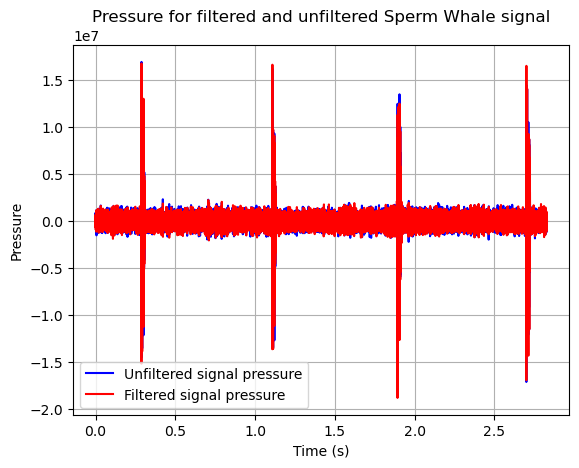

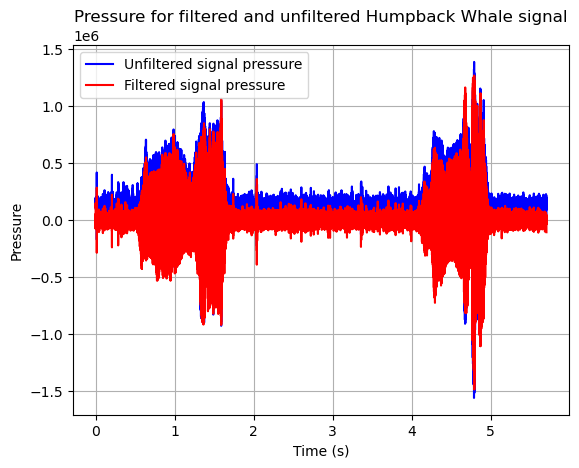

In [46]:
# 3.4
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt

# Define filter order
N_filt = 3

# cutoff frequency
cutoff = 200 # Hz
# butterworth filter
b, a = signal.butter(N_filt, cutoff, btype='high', fs=Fs_sp) #b = numerator , a = denominator polynomials of the filter

# application of the above filter to the Sperm whale signal
filtered_signal_sp = signal.lfilter(b, a, y_sp)

# Pressure for the filtered signal of Sperm Whale
pressure_filtered_sp = (3.5 * filtered_signal_sp * GF) / (10**(S / 20))

# Plotting the pressure-time of the unfiltered and the filtered signal in the same diagram
plt.figure()
t_sp = np.linspace(0, len(pressure_sp) / Fs_sp, len(pressure_sp))
plt.plot(t_sp, pressure_sp, color='blue', label='Unfiltered signal pressure')
plt.legend()

t_filt_sp = np.linspace(0, len(pressure_filtered_sp) / Fs_sp, len(pressure_filtered_sp))
plt.plot(t_filt_sp, pressure_filtered_sp, color='red', label='Filtered signal pressure')
plt.legend()

plt.xlabel('Time (s)')
plt.title('Pressure for filtered and unfiltered Sperm Whale signal')
plt.ylabel('Pressure')
plt.grid(True)

# application of the above filter to the Humpback whale signal
filtered_signal_hmp = signal.lfilter(b, a, y_hmp)

# Pressure for the filtered signal of Sperm Whale
pressure_filtered_hmp = (3.5 * filtered_signal_hmp * GF) / (10**(S / 20))

# Plotting the pressure-time of the unfiltered and the filtered signal in the same diagram
plt.figure()
t_hmp = np.linspace(0, len(pressure_hmp) / Fs_hmp, len(pressure_hmp))
plt.plot(t_hmp, pressure_hmp, color='blue', label='Unfiltered signal pressure')
plt.legend()

t_filt_hmp = np.linspace(0, len(pressure_filtered_hmp) / Fs_hmp, len(pressure_filtered_hmp))
plt.plot(t_filt_hmp, pressure_filtered_hmp, color='red', label='Filtered signal pressure')
plt.legend()

plt.xlabel('Time (s)')
plt.title('Pressure for filtered and unfiltered Humpback Whale signal')
plt.ylabel('Pressure')
plt.grid(True)

In [47]:
# 3.5

# Load the man-made sound
y_hum, Fs_hum = librosa.load('Pile driving.wav')
#print(f"The Fs_hum is {Fs_hum}")
#display(Audio('Pile driving.wav'))

# Hydrophone operation characteristics
GF_hum = 0.16 # Gain Factor
S_hum = -175 # Sensitivity

# pressure for the man-made signal
pressure_hum = (3.5 * y_hum * GF_hum) / (10**(S_hum / 20))

# Length of the man-made signal 
N_hum = len(y_hum)

# Sum of squeared pressures
sum_p_hum = np.sum(pressure_hum[1:N_hum+1] ** 2)

# Calculation of the rms of the man-made signal pressure
p_rms_hum = np.sqrt((1/N_hum)*sum_p_hum)
print(f"p_rms_hum is {p_rms_hum}")

p_ref = 1 #μPa 

# Sound Pressure Level
SPL_rms_hum = 20*np.log10(p_rms_hum / p_ref)

print(f"SPLrms_hum is {SPL_rms_hum}")


# For the Humpback whale we are going to filter the man-made signal letting only between 300Hz to 3kHz

# Cutoff freqs
f_lower = 300 # Hz
f_higher = 3000 # Hz
Wn = [f_lower, f_higher]

# Butterworth filter
b_hum, a_hum = signal.butter(N_filt, Wn, btype='bandpass', fs=Fs_hum)
filtered_signal_hum = signal.lfilter(b_hum, a_hum, y_hum)

# pressure for the filtered man-made signal
pressure_filtered_hum = (3.5 * filtered_signal_hum * GF_hum) / (10**(S_hum / 20))

# Length of the man-made filtered signal 
N_filtered_hum = len(filtered_signal_hum)

# Sum of squeared pressures
sum_p_filtered_hum = np.sum(pressure_filtered_hum[1:N_filtered_hum+1] ** 2)

# Calculation of the rms of the man-made filtered signal pressure
p_rms_filtered_hum = np.sqrt((1/N_filtered_hum)*sum_p_filtered_hum)
print(f"p_rms_filtered_hum is {p_rms_filtered_hum}")

# Sound Pressure Level for the filtered signal
SPL_rms_filtered_hum = 20*np.log10(p_rms_filtered_hum / p_ref)

print(f"SPLrms_fitlered_hum is {SPL_rms_filtered_hum}")


p_rms_hum is 180987455.92586175
SPLrms_hum is 165.15296950722166
p_rms_filtered_hum is 11909710.935415277
SPLrms_fitlered_hum is 141.51802441407614


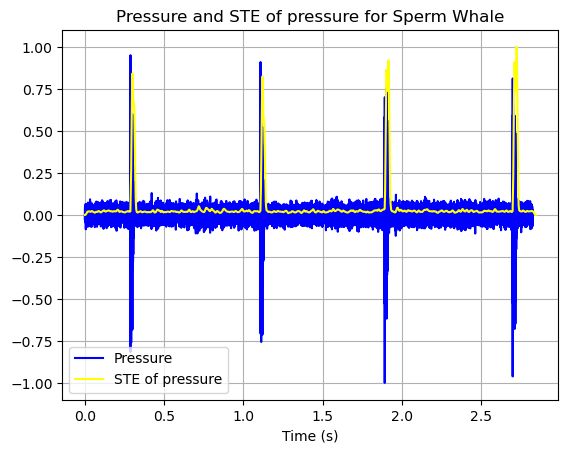

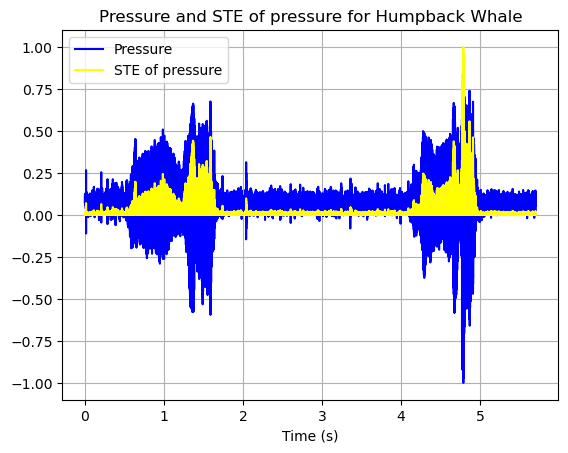

In [48]:
# 3.6 

# Short-time Energy

# For the Sperm whale

# Hamming window of length Ν_sp
N_sp = (0.02 *  Fs_sp)
ham_win_p_sp = np.hamming(N_sp)

# We calculate the short time energy as a convolution of the squared signal and the hamming window
sqr_signal_p_sp = (abs(pressure_sp)) ** 2
energy_p_sp = convolve(sqr_signal_p_sp, ham_win_p_sp)

# Normalization of magnitudes because the STE spans a different range than the pressure signal
energy_p_sp = energy_p_sp / np.max(np.abs(energy_p_sp))
pressure_sp = pressure_sp / np.max(np.abs(pressure_sp))

# Pressure-time plot for the Sperm Whale
plt.figure()
t_sp = np.linspace(0, len(pressure_sp) / Fs_sp, len(pressure_sp))
plt.plot(t_sp, pressure_sp, color='blue', label='Pressure')
plt.legend()

# Short-time Energy of Pressure
t_en_sp = np.linspace(0, len(energy_p_sp) / Fs_sp, len(energy_p_sp))
plt.plot(t_en_sp, energy_p_sp, color='yellow', label='STE of pressure')
plt.legend()

plt.xlabel('Time (s)')
plt.title('Pressure and STE of pressure for Sperm Whale')
plt.grid(True)

# For the Humpback whale
# Hamming window of length Ν_hmp
N_hmp = 3
ham_win_hmp = np.hamming(N_hmp)

# We calculate the short time energy as a convolution of the squared signal and the hamming window
sqr_signal_p_hmp = (abs(pressure_hmp)) ** 2
energy_p_hmp = convolve(sqr_signal_p_hmp, ham_win_hmp) 

# Normalization of magnitudes because the STE spans a different range than the pressure signal
energy_p_hmp = energy_p_hmp / np.max(np.abs(energy_p_hmp))
pressure_hmp = pressure_hmp / np.max(np.abs(pressure_hmp))

# Pressure-time plot for the Sperm Whale
plt.figure()
t_hmp = np.linspace(0, len(pressure_hmp) / Fs_hmp, len(pressure_hmp))
plt.plot(t_hmp, pressure_hmp, color='blue', label='Pressure')
plt.legend()

# Short-time Energy of Pressure
t_en_p_hmp = np.linspace(0, len(energy_p_hmp) / Fs_hmp, len(energy_p_hmp))
plt.plot(t_en_p_hmp, energy_p_hmp, color='yellow', label='STE of pressure')
plt.legend()

plt.xlabel('Time (s)')
plt.title('Pressure and STE of pressure for Humpback Whale')
plt.grid(True)


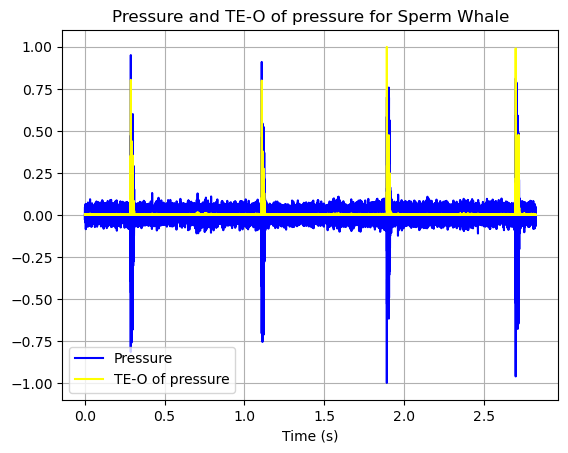

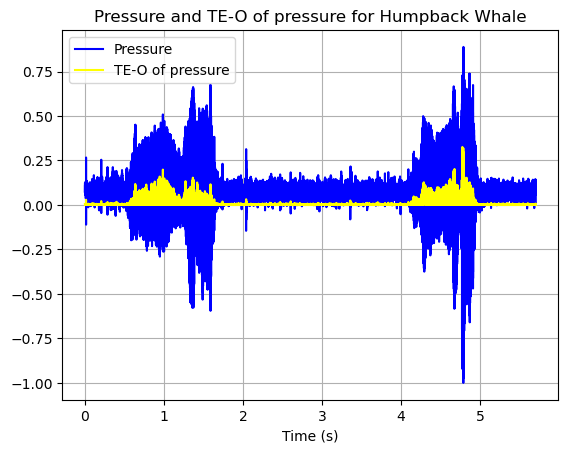

In [49]:
# 3.7

# Teager-Kaiser Energy Operation

# For the Sperm whale

squeared_press_sp = pressure_sp ** 2  
# We "roll" the pressure signal to the right so as to get p[n-1]
pressure_circ_shift_sp = np.roll(pressure_sp, 1)
# We "roll" the pressure signal to the right so as to get p[n+1]
pressure_circ_shift_neg_sp = np.roll(pressure_sp, -1)

# TE-O
Ψ_sp = squeared_press_sp - pressure_circ_shift_sp*pressure_circ_shift_neg_sp
Ψ_abs_sp = np.abs(Ψ_sp)

# Pressure-time plot for the Sperm Whale
plt.figure()
t_sp = np.linspace(0, len(pressure_sp) / Fs_sp, len(pressure_sp))
plt.plot(t_sp, pressure_sp, color='blue', label='Pressure')
plt.legend()

# TE-O plot for Sperm whale
t_te_sp = np.linspace(0, len(Ψ_abs_sp) / Fs_sp, len(Ψ_abs_sp))
plt.plot(t_te_sp, Ψ_abs_sp, color='yellow', label='TE-O of pressure')
plt.legend()

plt.xlabel('Time (s)')
plt.title('Pressure and TE-O of pressure for Sperm Whale')
plt.grid(True)

# For the Humpback whale

squeared_press_hmp = pressure_hmp ** 2  
# We "roll" the pressure signal to the right so as to get p[n-1]
pressure_circ_shift_hmp = np.roll(pressure_hmp, 1)
# We "roll" the pressure signal to the right so as to get p[n+1]
pressure_circ_shift_neg_hmp = np.roll(pressure_hmp, -1)

# TE-O
Ψ_hmp = squeared_press_hmp - pressure_circ_shift_hmp*pressure_circ_shift_neg_hmp
Ψ_abs_hmp = np.abs(Ψ_hmp)

# Pressure-time plot for the Humpback Whale
plt.figure()
t_hmp = np.linspace(0, len(pressure_hmp) / Fs_hmp, len(pressure_hmp))
plt.plot(t_hmp, pressure_hmp, color='blue', label='Pressure')
plt.legend()

# TE-O plot for Humpback whale
t_te_hmp = np.linspace(0, len(Ψ_abs_hmp) / Fs_hmp, len(Ψ_abs_hmp))
plt.plot(t_te_hmp, Ψ_abs_hmp, color='yellow', label='TE-O of pressure')
plt.legend()

plt.xlabel('Time (s)')
plt.title('Pressure and TE-O of pressure for Humpback Whale')
plt.grid(True)

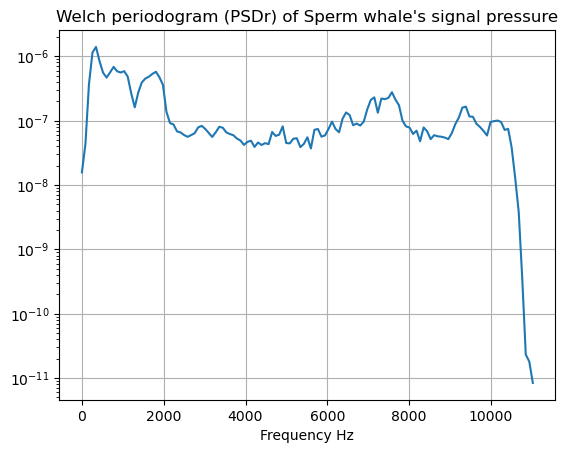

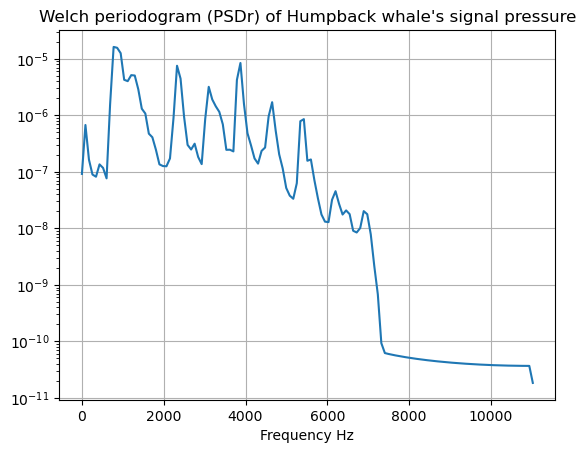

In [50]:
# 3.8

# Power spectral density

# For the Sperm whale

# Welch periodogram
freqs_sp, PSDr_sp = signal.welch(pressure_sp, fs=Fs_sp, window='hamming')

# We plot the Welch periodogram in logarithimic scale
plt.figure()
plt.semilogy(freqs_sp, PSDr_sp)
plt.xlabel('Frequency Hz')
plt.title("Welch periodogram (PSDr) of Sperm whale's signal pressure")
plt.grid(True)

# For the Humpback whale

# Welch periodogram
freqs_hmp, PSDr_hmp = signal.welch(pressure_hmp, fs=Fs_hmp, window='hamming')

# We plot the Welch periodogram in logarithimic scale
plt.figure()
plt.semilogy(freqs_hmp, PSDr_hmp)
plt.xlabel('Frequency Hz')
plt.title("Welch periodogram (PSDr) of Humpback whale's signal pressure")
plt.grid(True)


Text(0.5, 1.0, 'Spectrogram of Humpback whale signal')

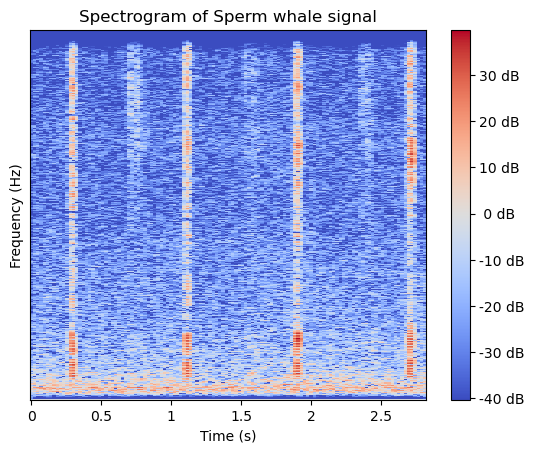

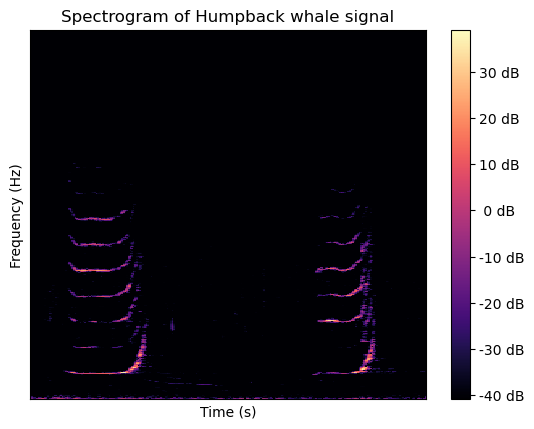

In [51]:
# 3.9

# For the Sperm whale

# Fourier transform of Sperm whale signal
y_sp_stft = librosa.stft(y_sp)

# Spectogram method
y_sp_stft_abs = np.abs(y_sp_stft)
y_squeared_stft_abs_sp = y_sp_stft_abs ** 2
y_sp_stft_db = librosa.amplitude_to_db(y_squeared_stft_abs_sp)

plt.figure()
librosa.display.specshow(y_sp_stft_db, sr=Fs_sp, x_axis='time')
plt.colorbar(format='%2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Sperm whale signal')

# For the Humpback whale    

# Fourier transform of Humpback whale signal
y_hmp_stft = librosa.stft(y_hmp)

# Spectogram method
y_hmp_stft_abs = np.abs(y_hmp_stft)
y_squared_stft_abs_hmp = y_hmp_stft_abs ** 2
y_hmp_stft_db = librosa.amplitude_to_db(y_squared_stft_abs_hmp)

plt.figure()
librosa.display.specshow(y_hmp_stft_db)
plt.colorbar(format='%2.0f dB')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Spectrogram of Humpback whale signal')
   

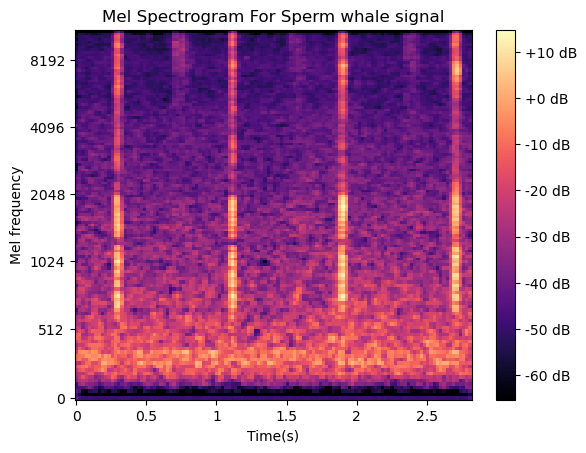

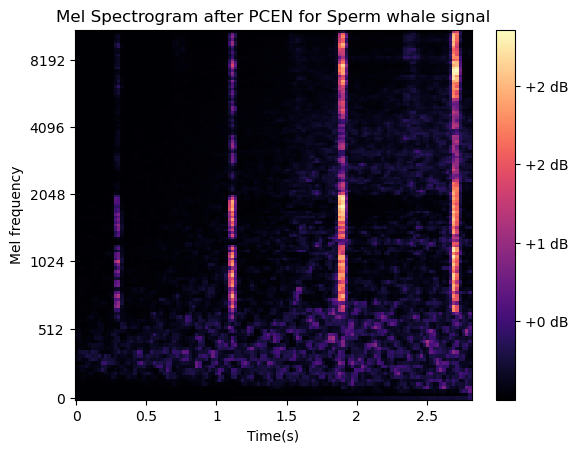

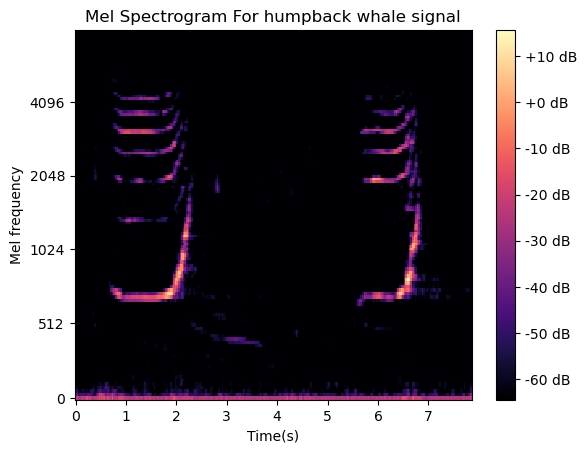

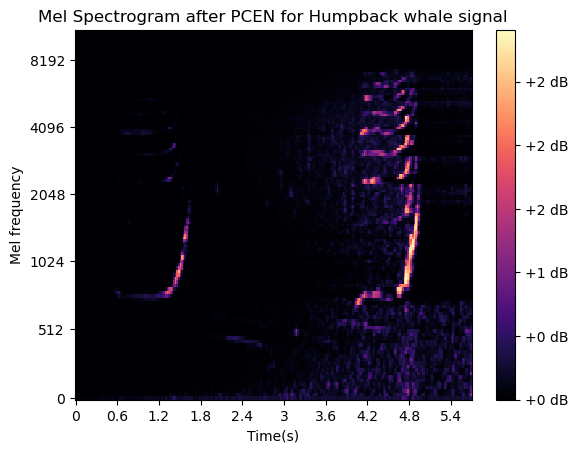

In [53]:
# 3.10

import librosa
import librosa.display

# For the Sperm whale

# Mel-spectrogram of Sperm whale signal
mel_sp = librosa.feature.melspectrogram(y=y_sp)

# Convert power spectrogram to dB scale
mel_sp_db = librosa.amplitude_to_db(mel_sp)

# Application of the PCEN method on the above
pcen_sp = librosa.pcen(mel_sp)
librosa.amplitude_to_db(pcen_sp)

# Plot Mel spectrogram
plt.figure()
librosa.display.specshow(mel_sp_db, sr=Fs_sp, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram For Sperm whale signal')
plt.xlabel('Time(s)')
plt.ylabel('Mel frequency')
plt.show()

# Plot spectrogram after PCEN method
plt.figure()
librosa.display.specshow(pcen_sp, sr=Fs_sp, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram after PCEN for Sperm whale signal')
plt.xlabel('Time(s)')
plt.ylabel('Mel frequency')
plt.show()

# For the Humpback whale

# Mel-spectrogram of Humpback whale signal
mel_hmp = librosa.feature.melspectrogram(y=y_hmp)

# Convert power spectrogram to dB scale
mel_hmp_db = librosa.amplitude_to_db(mel_hmp)

# Application of the PCEN method on the above
pcen_hmp = librosa.pcen(mel_hmp)

# Plot Mel spectrogram
plt.figure()
librosa.display.specshow(mel_hmp_db, sr=Fs, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram For humpback whale signal')
plt.xlabel('Time(s)')
plt.ylabel('Mel frequency')
plt.show()

#Plot spectrogram after PCEN method
plt.figure()
librosa.display.specshow(pcen_hmp, sr=Fs_hmp, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram after PCEN for Humpback whale signal')
plt.xlabel('Time(s)')
plt.ylabel('Mel frequency')
plt.show()